## 0 - chargement et exploration rapide des données

In [1]:
from sklearn import linear_model   # import de tous les modeles lineaire = + simple mais mettre alors linear_model.xxx pour instancier le model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

df = pd.read_excel('admissions.xlsx')
df.head()

,Unnamed: 0,admit,gre,gpa,prestige
0,0,0,380,3.61,3
1,1,1,660,3.67,3
2,2,1,800,4.00,1
3,3,1,640,3.19,4
4,4,0,520,2.93,4


In [2]:
""" ne pas lancer, juste process pour copier datasat et archiver sur mon PC """
#df = pd.read_clipboard()
#df.to_excel('admissions.xlsx')

' ne pas lancer, juste process pour copier datasat et archiver sur mon PC '

In [3]:
import matplotlib
matplotlib.__version__

'3.5.1'

In [4]:
from matplotlib import pyplot
matplotlib.__version__

'3.5.1'

In [5]:
df = df.drop('Unnamed: 0', axis=1)
df.head()

,admit,gre,gpa,prestige
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [6]:
df.columns

Index(['admit', 'gre', 'gpa', 'prestige'], dtype='object')

In [7]:
# afficher les infos du data_set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   admit     40 non-null     int64  
 1   gre       40 non-null     int64  
 2   gpa       40 non-null     float64
 3   prestige  40 non-null     int64  
dtypes: float64(1), int64(3)
memory usage: 1.4 KB


In [8]:
# on voit 2 Nan sur 'gre' dans vrai dataset
# les types ici de 'gre' et 'prestige' sont a changer en 'float64' => pb lors de copie perso du df
df.gre = df.gre.astype('float64')
df.prestige = df.prestige.astype('float64')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   admit     40 non-null     int64  
 1   gre       40 non-null     float64
 2   gpa       40 non-null     float64
 3   prestige  40 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 1.4 KB


In [10]:
df.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


In [11]:
# ----------------------   DEBUT SEANCE 1 - CLASSIFICATION PAR REGRESSION LOGISTIQUE ------------------
pd.__version__ 

'1.4.2'

In [12]:
# (g) Mettre à jour df en supprimant les échantillons (lignes) contenant au moins une valeur nulle.
df = df.dropna(axis=0)

In [13]:
#(h) Afficher la moyenne de la variable gre par groupe d'élèves admis / non admis, grâce à la combinaison des méthodes groupby et mean.
df[['gre', 'admit']].groupby('admit').mean()

,gre
admit,
0,564.545455
1,662.222222


In [14]:
df.groupby(['admit']).agg({'gre':'mean'})  # je préfère ce code !!!

,gre
admit,
0,564.545455
1,662.222222


# 1 -Préparation des colonnes de classements
## pd.cut() discrétiser une variable numérique et pd.get_dummies() créerajouter

### discrétisation

In [15]:
df.describe()

,admit,gre,gpa,prestige
count,40.000000,40.000000,40.000000,40.000000
mean,0.450000,608.500000,3.396500,2.400000
std,0.503831,139.441192,0.398899,1.104768
min,0.000000,360.000000,2.560000,1.000000
25%,0.000000,520.000000,3.117500,1.000000
50%,0.000000,600.000000,3.350000,2.000000
75%,1.000000,760.000000,3.742500,3.000000
max,1.000000,800.000000,4.000000,4.000000


In [16]:
# (i) discrétiser la variable gre de df. On considèrera les classes suivantes :
#Si le score est entre 200 et 450, alors le score est 'mauvais'.
#Si le score est entre 450 et 550, alors le score est 'moyen'.
#Si le score est entre 550 et 620, alors le score est 'moyen+'.
#Si le score est entre 620 et 800 (score maximal), alors le score est 'bon'

# on discretise 'gre'
test_gre = pd.cut(x = df['gre'], bins = [200, 450, 550, 620, 800],
                  labels = ['mauvais', 'moyen', 'moyen +', 'bon'])
test_gre.head()

0    mauvais
1        bon
2        bon
3        bon
4      moyen
Name: gre, dtype: category
Categories (4, object): ['mauvais' < 'moyen' < 'moyen +' < 'bon']

In [17]:
#(j) Croiser la variable admit de df avec notre discrétisation à l'aide de la fonction crosstab de pandas.
# on croise les données entre 'gre' discrétisé donc test_gre et 'admit' les admissible pour analyser
pd.crosstab(df['admit'], test_gre)

gre,mauvais,moyen,moyen +,bon
admit,,,,
0,6,6,3,7
1,0,5,2,11


In [18]:
#(k) analyse des résultats
print("Plus le résultat obtenu au GRE est élevé, plus le candidat **semble** avoir de chances d'être admis.\
En effet, les classes d'admis dominantes sont 'bons' et 'moyen+")

Plus le résultat obtenu au GRE est élevé, plus le candidat **semble** avoir de chances d'être admis.En effet, les classes d'admis dominantes sont 'bons' et 'moyen+


In [19]:
##(l) Discrétiser la variable gpa de df. On considèrera les classes suivantes :
#Si la moyenne est entre 2 et 2.8, alors le niveau de l'étudiant est 'mauvais'.
#Si la moyenne est entre 2.8 et 3.2, alors le niveau de l'étudiant est 'moyen'.
#Si la moyenne est entre 3.2 et 3.6, alors le niveau de l'étudiant est 'moyen+'.
#Si la moyenne est entre 3.6 et 4, alors le niveau de l'étudiant est 'bon'.

# discretisation des myennes des notes = 'gpa'
class_notes = pd.cut(x = df['gpa'], bins = [2, 2.8 ,3.2, 3.6, 4],
                  labels = ['mauvais', 'moyen', 'moyen +', 'bon'])
class_notes.head()

0      bon
1      bon
2      bon
3    moyen
4    moyen
Name: gpa, dtype: category
Categories (4, object): ['mauvais' < 'moyen' < 'moyen +' < 'bon']

In [20]:
# (m) Croiser la variable admit de df avec notre discrétisation. 
# On utilisera l'argument normalize de la fonction crosstab pour obtenir les proportions d'admissions en fonction du niveau de l'étudiant.
pd.crosstab(df.admit, class_notes, normalize=1)  # ou normalize = 'columns' attention = True normalize tout le tableau donc
# somme tout = 100%, normalize=1=par colonnes => somme chaque col = 100 %, normalize=0 => sommme par ligne = 100%


gpa,mauvais,moyen,moyen +,bon
admit,,,,
0,0.5,0.692308,0.666667,0.375
1,0.5,0.307692,0.333333,0.625


In [21]:
print("Les étudiants ayant un 'bon' niveau ont plus de chances d'être admis que la moyenne (0.64 > 0.5).\
      Par contre, avoir un niveau 'moyen' ou 'moyen+' n'est pas très avantageux.")

Les étudiants ayant un 'bon' niveau ont plus de chances d'être admis que la moyenne (0.64 > 0.5).      Par contre, avoir un niveau 'moyen' ou 'moyen+' n'est pas très avantageux.


### ensuite dichotomisation

In [22]:
#(o) À l'aide de la fonction get_dummies de pandas, dichotomiser les discrétisations effectuées dans les questions précédentes.
#    On ajoutera aux nouvelles colonnes les préfixes 'niveau' et 'gre'.
#(p) À l'aide d'une jointure ou d'une concatenation (merge, concat), fusionner les nouveaux DataFrames obtenus avec df.

In [23]:
# dichotomisation de 'class_notes'
pd.get_dummies(class_notes, prefix='niveau').head()

,niveau_mauvais,niveau_moyen,niveau_moyen +,niveau_bon
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,1,0,0
4,0,1,0,0


In [24]:
# fusion par join() de df et série class_notes
df = df.join(pd.get_dummies(class_notes, prefix='niveau'))
df.head()

,admit,gre,gpa,prestige,niveau_mauvais,niveau_moyen,niveau_moyen +,niveau_bon
0,0,380.0,3.61,3.0,0,0,0,1
1,1,660.0,3.67,3.0,0,0,0,1
2,1,800.0,4.00,1.0,0,0,0,1
3,1,640.0,3.19,4.0,0,1,0,0
4,0,520.0,2.93,4.0,0,1,0,0


In [25]:
# (q) Appliquer également la dichotomisation à la variable 'prestige' de df, et joindre le DataFrame obtenu à df.
df = df.join(pd.get_dummies(df.prestige, prefix='prest'))
df.head()

,admit,gre,gpa,prestige,niveau_mauvais,niveau_moyen,niveau_moyen +,niveau_bon,prest_1.0,prest_2.0,prest_3.0,prest_4.0
0,0,380.0,3.61,3.0,0,0,0,1,0,0,1,0
1,1,660.0,3.67,3.0,0,0,0,1,0,0,1,0
2,1,800.0,4.00,1.0,0,0,0,1,1,0,0,0
3,1,640.0,3.19,4.0,0,1,0,0,0,0,0,1
4,0,520.0,2.93,4.0,0,1,0,0,0,0,0,1


In [26]:
# (r) Afficher les informations du nouveau DataFrame df.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   admit           40 non-null     int64  
 1   gre             40 non-null     float64
 2   gpa             40 non-null     float64
 3   prestige        40 non-null     float64
 4   niveau_mauvais  40 non-null     uint8  
 5   niveau_moyen    40 non-null     uint8  
 6   niveau_moyen +  40 non-null     uint8  
 7   niveau_bon      40 non-null     uint8  
 8   prest_1.0       40 non-null     uint8  
 9   prest_2.0       40 non-null     uint8  
 10  prest_3.0       40 non-null     uint8  
 11  prest_4.0       40 non-null     uint8  
dtypes: float64(3), int64(1), uint8(8)
memory usage: 1.7 KB


In [27]:
# - Les variables explicatives, en anglais features, de chaque candidat sont représentées par les attributs commençant par niveau, gre, et prest du DataFrame.  
# La variable à prédire est admit.

# (s) Créer un DataFrame data dans laquelle vous stockerez les features dichotomisées commençant par niveau et  prest.  
# - Nous faisons le choix d'utiliser uniquement ces variables pour entraîner notre modèle.
# (t) Affecter les données cibles à la variable target.

In [28]:
data = df.drop(['admit', 'gpa', 'prestige', 'gre'], axis=1)
data.head()

,niveau_mauvais,niveau_moyen,niveau_moyen +,niveau_bon,prest_1.0,prest_2.0,prest_3.0,prest_4.0
0,0,0,0,1,0,0,1,0
1,0,0,0,1,0,0,1,0
2,0,0,0,1,1,0,0,0
3,0,1,0,0,0,0,0,1
4,0,1,0,0,0,0,0,1


In [29]:
target = df['admit']
target.head()

0    0
1    1
2    1
3    1
4    0
Name: admit, dtype: int64

In [30]:
# (u) Afficher les noms des colonnes de data.
data.head()

,niveau_mauvais,niveau_moyen,niveau_moyen +,niveau_bon,prest_1.0,prest_2.0,prest_3.0,prest_4.0
0,0,0,0,1,0,0,1,0
1,0,0,0,1,0,0,1,0
2,0,0,0,1,1,0,0,0
3,0,1,0,0,0,0,0,1
4,0,1,0,0,0,0,0,1


# 2 - Classifier models

In [31]:
# (v) Diviser aléatoirement les matrices en un ensemble d'entraînement et un ensemble de test correspondant respectivement à 80% et 20 %   
# de la quantité totale des données disponibles. Précisément, data sera divisé en X_train et X_test et target sera divisé en y_train et y_test.
# Ajouter l'argument random_state = 66 pour une reproductivité de l'aléatoire.

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=66)
print("shapes de X_train, X_test, y_train, y_test = ",X_train.shape, X_test.shape, y_train.shape, y_test.shape) 

shapes de X_train, X_test, y_train, y_test =  (32, 8) (8, 8) (32,) (8,)


## a) LogisticRegression()  
### = model de fonction de heaviside ( predict 0 ou 1 ) selon activation d'1 fct° logistique

In [33]:
#b) Créer un Classifieur clf, ayant pour paramètre C = 1.0, en utilisant la méthode LogisticRegression du package linear_model.

In [34]:
# Création du classifieur et construction du modèle sur les données d'entraînement
clf = linear_model.LogisticRegression(C=1.0)  # C= 1 par défaut = inverse du param de régularisation de la fonction logistique J(theta) donnant 1 prba sur [0, 1]
clf.fit(X_train, y_train)

LogisticRegression()

### predict() et confusion_matrix()

In [35]:
# Il est alors possible de calculer la prédiction pour les données présentes dans l'ensemble de test, et construire la matrice de confusion.

#(a) Prédire les données de l'ensemble de test et stocker les dans la variable y_pred.
#(b) Créer et afficher la matrice de confusion cm.

In [36]:
# y_pred
y_pred = clf.predict(X_test)
y_pred # shape = (8,)

array([0, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [37]:
# Calcul de la matrice de confusion 
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[3 0]
 [4 1]]


In [38]:
## Méthode 2 : à l'aide de pandas
cm = pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])
cm

Classe prédite,0,1
Classe réelle,,
0,3,0
1,4,1


In [39]:
# La matrice de confusion, ci-dessus, illustre que le nombre de bonnes classifications (sur la diagonale) 
# est supérieur au nombre de mauvaises classifications.

# Le taux de bonnes prédictions ('accuracy') d'un modèle est une métrique souvent utilisée en classification et 
# correspond au nombre d'éléments bien classés sur le nombre total d'individus. Il peut se calculer 'à la main' où à l'aide de la méthode score du classifieur (clf).

# (c) Calculer le taux de bonnes prédictions du modèle.

In [40]:
clf.score(X_test, y_test)

0.5

In [41]:
from sklearn.metrics import classification_report   # est mieux pour l'évaluation du model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.43      1.00      0.60         3
           1       1.00      0.20      0.33         5

    accuracy                           0.50         8
   macro avg       0.71      0.60      0.47         8
weighted avg       0.79      0.50      0.43         8



### predict_proba()

In [42]:
#Par défaut, la méthode predict() d'un classifieur dans le cas d'une régression logistique classe les individus comme positifs 
#lorsque la probabilité d'appartenir à la classe positive est supérieure au seuil de 0.5, et négatifs sinon.

# Parfois, on peut vouloir modifier ce seuil de classification.
# La méthode predict_proba retourne, pour des individus donnés, non pas les prédictions de classes mais les probabilités d'appartenir à chacune des deux classes.

# Ainsi, par exemple, il est possible de classer les individus selon le seuil que l'on souhaite.

In [43]:
# (e) Créer un tableau probs contenant les probabilités pour les individus de X_test d'appartenir à la classe 0 ou la classe 1.
probs = clf.predict_proba(X_test) # -> retourne array (n_échantillons, n_classes) = probabilité de l'échantillon pour chaque classe du modèle
probs   # shape (8,2)

array([[0.82758142, 0.17241858],
       [0.32007925, 0.67992075],
       [0.59789682, 0.40210318],
       [0.70943869, 0.29056131],
       [0.50454317, 0.49545683],
       [0.70943869, 0.29056131],
       [0.82758142, 0.17241858],
       [0.70454718, 0.29545282]])

In [44]:
# (f) Créer un vecteur y_preds qui, pour chaque ligne de probs vaut 1 si la probabilité d'appartenir à la classe 1 est supérieure à 0.4, et 0 sinon.
y_preds = np.where(probs[:,1]>0.4,1,0)  # where() de numpy : si condtion True alors valeur de probs devient ici 1 sinon devient le suivant ici 0
y_preds

array([0, 1, 1, 0, 1, 0, 0, 0])

In [45]:
# (g) Afficher une matrice de confusion entre les vrais labels de y_test et y_preds.
cm = pd.crosstab(y_test, y_preds, rownames=['Classe réelle'], colnames=['Classe prédite'])
cm

Classe prédite,0,1
Classe réelle,,
0,2,1
1,3,2


### évaluation par courbe ROC  roc_curve()

On observe évidemment que plus le seuil de classification est bas, plus le nombre d'individus classés comme 1 augmente, la sensibilité va donc croître. A contrario, un individu est classé 0 seulement si la probabilité qu'il appartienne à cette classe est supérieure à 0.6, ce qui augmente la précision de la classe nulle mais fait décroître la spécificité.

Un outil également très efficace pour évaluer les performances d'un modèle est la courbe ROC. La courbe ROC (pour Receiver Operating Characteristic) est l'outil idéal pour résumer la <span style="color:GreenYellow">performance d'un classifieur binaire</span> en fonction de tous les seuils possibles. Elle évite un long travail de prédictions de classes pour différents seuils, et d'évaluation de la matrice de confusion pour chacun de ces seuils.

Graphiquement, <span style="color:GreenYellow">la mesure ROC</span> est représentée sous la forme d'une courbe qui donne le taux de vrais positifs, la sensibilité, en fonction du taux de faux positifs, l'antispécificité ( = 1 - spécificité). Chaque valeur de seuil de classification fournira un point de la courbe ROC, qui ira de (0, 0) à (1, 1).

Plus la courbe se rapproche du point (0,1) (en haut à gauche), meilleures sont les prédictions. Un modèle avec une sensibilité et une spécificité égales à 1 est considéré comme parfait.

L'<span style="color:GreenYellow">aire sous la courbe (AUC : Area Under the Curve)</span> est très utile. En un seul nombre elle résume la capacité du modèle à distinguer la classe négative de la classe positives (Non Admis / Admis).

Un score AUC de 0.5 signifie que le modèle n'est pas meilleur qu'une classification aléatoire, un score AUC de 1.0 signifie un modèle parfaitement prédictif, et un AUC de 0.0 est parfaitement anti-prédictif (très rare).

Le module sklearn.metrics contient la fonction roc_curve() qui permet de retourner un tableaux contenant les taux de faux positifs (antispécificité) , un tableau des taux de vrais positifs (sensibilité), et un tableau de seuils de classification prenant des valeures comprises entre 0 et 1. Elle prend en argument le vecteur des labels que l'on souhaite prédire, un vecteur des probabilités d'appartenir à la classe positive et l'argument pos_label, qui permet de choisir quel label est défini comme positif.

La fonction <span style="color:GreenYellow">auc()</span> du même module calcule l'aire sous la courbe lorsqu'on lui donne en arguments un vecteur de taux de faux positifs et un vecteur de même taille de taux de vrais positifs.

In [46]:
#(h) Importer les fonctions roc_curve() et auc().
from sklearn.metrics import roc_curve, auc


In [47]:
#(i) Appliquer la fonction roc_curve() à y_test et la deuxième colonne de probs, en précisant que le label positif dans notre cas est 1. 
# Stocker les résultats retournés dans les tableaux fpr, tpr, seuils.

fpr, tpr, seuils = roc_curve(y_test, probs[:,1], pos_label=1) # fpr= false positif rate, tpr = true positif rate
print(fpr, tpr, seuils)

[0.         0.         0.         0.33333333 0.33333333 1.        ] [0.  0.2 0.4 0.4 0.6 1. ] [1.67992075 0.67992075 0.49545683 0.40210318 0.29545282 0.17241858]


In [48]:
#(j) Calculer dans roc_auc l'AUC correspondant aux valeurs de fpr et tpr.

In [49]:
roc_auc = auc(fpr, tpr)  # auc = area under curve ( aire sous la courbe ), si > 0.5 le model est meilleur qu'ne classification aléatoire
roc_auc

0.6666666666666667

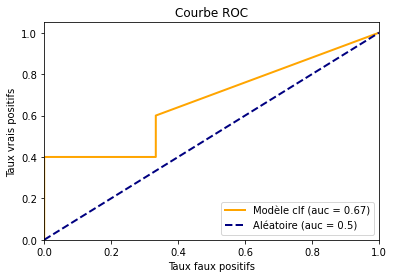

In [50]:
# (k) A partir des variables fpr, tpr et roc_auc , créer une reproduction du graphique ci-dessous : ( voir résultat )
import matplotlib.pyplot as plt

plt.plot(fpr, tpr, color='orange', lw=2, label='Modèle clf (auc = %0.2f)' % roc_auc)  # fpr en Ox et tpr en Oy
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Aléatoire (auc = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux faux positifs')
plt.ylabel('Taux vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc="lower right")  # legend en bas à droite avec loc=
plt.show();



## b) SVM Support Vector Machine

In [51]:
# chargment des bibliotheques et du csv wine !

In [52]:
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [53]:
wine = pd.read_excel('wine.xlsx')

In [54]:
wine.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,13.41,3.84,2.12,18.8,90,2.45,2.68,0.27,1.48,4.28,0.91,3.00,1035
1,2,12.29,2.83,2.22,18.0,88,2.45,2.25,0.25,1.99,2.15,1.15,3.30,290
2,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
3,1,13.05,1.73,2.04,12.4,92,2.72,3.27,0.17,2.91,7.20,1.12,2.91,1150
4,3,13.45,3.70,2.60,23.0,111,1.70,0.92,0.43,1.46,10.68,0.85,1.56,695


In [55]:
# target et data
data = wine.iloc[:, 1:14]
target = wine.iloc[:, 0]

In [56]:
# train_set et test_set
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)

### Standardisation de X_train mais pb pour X_test et X_new arrivants

L'étape suivante est donc la Standardisation. La standardisation, ou normalisation des données est le processus de soustraction de la moyenne pour chaque variable, puis de leur division par l'écart type.

Centrer-réduire les variables les transformera en unités compatibles avec distribution de moyenne 0 et d'écart-type 1, indépendantes de leurs distributions et unités de mesures originales.

La standardisation/normalisation est une tâche courante en Machine Learning. Beaucoup d'algorithmes présument que les features sont centrées autour de 0 et ont une variance approximativement égale.

Cette étape fait partie de ce que l'on appelle le <span style="color:GreenYellow">"preprocessing"</span> des données. Le preprocessing est rendu très facile par Scikit-Learn grâce au module du même nom importé au début d'exercice.

Par exemple, pour normaliser un tableau de données, il suffit de lui appliquer simplement la fonction preprocessing.scale.

In [57]:
# (l) Créer un tableau X_train_scaled, contenant les données centrées réduites de X_train.
X_train_scaled = preprocessing.scale(X_train)

In [58]:
# (m) Afficher la moyenne et l'écart type de chaque colonne de X_train_scaled
print(X_train_scaled.mean(axis=0))  # -> moyennes proches de 0
 
print(X_train_scaled.std(axis=0))    # -> écart-types proches de 1

[ 1.66929962e-15  1.24239243e-16  7.13714802e-17 -1.74463618e-16
 -2.59052039e-16 -3.67430953e-16  2.00897500e-16  2.27331381e-16
  4.48054292e-16 -8.98751972e-17 -6.34413157e-16 -2.96059473e-16
 -1.78428700e-16]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


### Tranformer API pour normaliser la suite automatiquement

Le nouveau tableau est donc bien standardisé, cependant cette méthode simple de preprocessing n'est pas toujours celle à préférer dans le cas d'une application réelle.

Pourquoi ? Pour la simple raison qu'il n'est pas possible d'appliquer cette même transformation à un échantillon de test, ou à des données nouvelles.
Il est possible évidemment de centrer et réduire n'importe quel échantillon de la même manière, mais avec une moyenne et un écart type qui seront différents de ceux utilisés sur l'ensemble d'entraînement
Les résultats obtenus ne seraient pas une juste représentation de la performance du modèle dans son ensemble, lorsqu'il sera appliqué à de nouvelles données.

Donc, <span style="color:GreenYellow">plutôt que d'appliquer directement la fonction de normalisation</span>, il est préférable d'utiliser une fonctionnalité de Scikit-Learn appelée <span style="color:GreenYellow">Transformer API</span>, qui vous permettra d'ajuster (fit) une étape de preprocessing en utilisant les données d'entraînement.
Ainsi lorsque la normalisation, par exemple, sera appliquée à d'autres échantillons, elle utilisera les mêmes moyennes et écart-types sauvegardés.

Pour créer cette étape de preprocessing 'ajustée' il suffit d'utiliser la fonction StandardScaler puis de l'ajuster grâce à aux données d'entraînement, de cette façon :

scaler = preprocessing.StandardScaler().fit(X_train)  
Pour l'appliquer à un tableau de données par la suite il faudra simplement lui appliquer <span style="color:GreenYellow">scaler.transform())</span>

In [59]:
# (n) Créer un objet scaler comme ci-dessus et l'appliquer à X_train pour retourner le tableau X_train_scaled centré-réduit.
scaler = preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)   #  FIT_TRANSFORM SUR TRAIN_SET §§§
X_train_scaled[:3, :]

array([[ 0.36667247,  1.89006188, -0.02267004,  0.20387723, -0.48628318,
        -0.54476791, -1.08906647,  1.09815848, -0.98490166, -0.44770722,
        -0.07845789, -0.73060683, -0.89648628],
       [-0.82406802, -0.55751629, -0.57198264, -0.15044733, -0.96873736,
        -0.25551061,  0.48038156, -0.72934299,  0.22509843, -0.64136018,
         1.10517406,  0.82507599, -0.37282639],
       [ 1.37218666,  0.82996433, -0.27901592, -0.97720463,  0.31780712,
         1.26309019,  1.06098662, -0.64231911,  0.90269848, -0.25405425,
         0.53703072,  1.25324557,  0.74793352]])

In [60]:
# (o) Afficher la moyenne et l'écart type des colonnes de X_train_scaled.
print(X_train_scaled.mean(axis=0))  # vérif que tous proches de 0 = OK
 
print(X_train_scaled.std(axis=0))  # verif que tous proches de 1  = OK


[ 1.66929962e-15  1.24239243e-16  7.13714802e-17 -1.74463618e-16
 -2.59052039e-16 -3.67430953e-16  2.00897500e-16  2.27331381e-16
  4.48054292e-16 -8.98751972e-17 -6.34413157e-16 -2.96059473e-16
 -1.78428700e-16]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [61]:
# (p) Appliquer la même transformation à X_test dans le tableau X_test_scaled.
# (q) Afficher la moyenne et l'écart type des colonnes de X_test_scaled
X_test_scaled = scaler.transform(X_test)    # SEULEMENT TRANSFORM SUR TEST_SET
 
print(X_test_scaled.mean(axis=0)) # -> moyenne proche de 0 = pas bon

 
print(X_test_scaled.std(axis=0)) # écart type proche de 1 mais pas terrible, car scaler vient des X_train !!!  = pas bon

[-0.73145487 -0.19399353 -0.28900342  0.00792501  0.0619602  -0.24104775
  0.08946282  0.06178319 -0.05943493 -0.56530738  0.11092322  0.08421286
 -0.41723878]
[1.19162219 0.97224761 0.54610521 0.59725011 1.77656424 1.00444286
 0.91378127 0.58724801 1.07464948 0.71606815 1.04686511 0.85939264
 1.30152473]


In [62]:
"""
Comme il fallait s'y attendre, les variables normalisées dans l'échantillon de test ne sont pas parfaitement centrées en zéro et de variance égale à 1, car nous transformons l'ensemble de test en utilisant les moyennes de l'ensemble d'apprentissage,   
et non pas de l'ensemble de test lui-même.
"""

"\nComme il fallait s'y attendre, les variables normalisées dans l'échantillon de test ne sont pas parfaitement centrées en zéro et de variance égale à 1, car nous transformons l'ensemble de test en utilisant les moyennes de l'ensemble d'apprentissage,   \net non pas de l'ensemble de test lui-même.\n"

### Classification par SVM
Les séparateurs à vastes marges sont des classifieurs qui reposent sur deux idées clés, qui permettent de traiter des problèmes  
de discrimination non linéaire, et de reformuler le problème de classement comme un problème d'optimisation quadratique.

La résolution du problème de classification passe par la construction d'une fonction  hh  qui à un vecteur d'entrée  xx  fait correspondre  
une sortie  yy  :  y=h(x)y=h(x) . Le principe des SVM est le même pour la classification à l'aide de la régression logistique.

SVM n'est qu'une approximation de celle de la régression logistique. Une telle fonction est avantageuse en termes de calcul en vertu de la rapidité d'optimisation.

Un modèle de classification par SVM se crée sur Scikit-learn grâce à la fonction svm.SVC (SVR dans le cas d'une régression).

Les arguments importants de la fonction svm.SVC sont : l'inverse du paramètre de la régularisation C, la fonction noyau (kernel) à utiliser, 
principalement linear, rbf ou poly, et gamma le coefficient pour les noyaux rbf et poly.

Il convient de noter que la méthode de classification par SVM ne fournit pas directement de probabilités d'appartenir à chaque classe mais  
les classes prédites elles-mêmes en fonction du score qu'elles attribuent à chaque individu.

In [63]:
# (b) Créer un classifieur clf, ayant pour paramètres gamma=0.01 et kernel='poly', en utilisant la méthode SVC du package svm.


In [64]:
clf = svm.SVC(gamma=0.01,  kernel='poly')

In [65]:
# (c) Entraîner l'algorithme sur l'ensemble d'entraînement (X_train_scaled et y_train)
clf.fit(X_train_scaled, y_train)

SVC(gamma=0.01, kernel='poly')

### Évaluation de SVM
Il est alors possible de calculer la prédiction pour les données présentes dans l'ensemble de test, et construire la matrice de confusion.

In [66]:
# (a) Effectuer les prédictions sur l'ensemble de test et les stocker dans la variable y_pred.
y_pred = clf.predict(X_test_scaled)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [67]:
# (b) Afficher une matrice de confusion à partir de ces prédictions.
pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])

Classe prédite,1
Classe réelle,
1,3
2,6
3,2


### pb hyperparam de SVM => GridSearchCV()

La matrice de confusion montre que la totalité des vins de l'ensemble de test ont été classés comme appartenant à la classe 1, alors qu'elle ne contient en réalité qu'un tiers des vins de l'échantillon. Notre modèle est donc aussi performant qu'un modèle purement aléatoire qui attribuerait une classe en la choisissant au hasard uniformément.

Est-ce le modèle qui est inapte sur ce type de données ou bien le paramétrage qui est inadapté ?

De nombreux algorithmes de machine learning, comme les SVM, reposent sur des <span style="color:GreenYellow">hyperparamètres</span> qui ne sont pas toujours évidents à déterminer pour obtenir les meilleures performances sur un jeu de données à traiter.

A la différence des paramètres simples du modèle qui découlent directement des données (par ex: les coefficients d'une régressions) les hyperparamètres permettent de décider de la structure du modèle et sont à régler avant l'entraînement de celui-ci.

Dans la majorité des cas, lorsque plusieurs hyperparamètres sont à régler, et qu'on ne sait pas lesquelles utiliser pour obtenir le meilleur modèle possible, la stratégie la plus efficace consiste en la création d'une grille de recherche.
On indique les paramètres à faire varier. Puis, grâce à la fonction <span style="color:GreenYellow">GridSearchCV()</span> du module model_selection, les paramètres sont croisés et un modèle est créé puis évalué pour chaque combinaison possible par validation croisée.

In [68]:
# (c) Créer un dictionnaire parametres contenant les valeurs possibles prises pour le paramètre C:[0.1,1,10], 
# pour kernel: ['rbf', 'linear','poly'] et pour gamma:[0.001, 0.1, 0.5].
param_grid = {'C':[0.1,1,10], 'kernel': ['rbf', 'linear','poly'], 'gamma': [0.001, 0.1, 0.5]}

In [69]:
# (d) Appliquer la fonction model_selection.GridSearchCV() au modèle clf, en lui spécifiant dans l'argument param_grid la grille de paramètres créée plus haut. 
# Retourner le classifieur ainsi créé dans grid_clf.
# L'argument scoring permet de choisir la métrique que l'on souhaite utiliser pour évaluer la performance des modèles, par défaut c'est l'accuracy.
grid_clf =model_selection.GridSearchCV(svm.SVC(), param_grid)

In [70]:
# (e) Entraîner grid_clf sur l'ensemble d'entraînement, (X_train_scaled, y_train). Sauvegarder les résultats dans l'objet grille
grille = grid_clf.fit(X_train_scaled,y_train)

In [71]:
# (f) Exécuter la cellule suivante pour afficher toutes les combinaisons possibles d'hyperparamètres et la performance moyenne du modèle associé par validation croisée.
print(pd.DataFrame.from_dict(grille.cv_results_).loc[:,['params', 'mean_test_score']]) 

                                            params  mean_test_score
0      {'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}         0.380556
1   {'C': 0.1, 'gamma': 0.001, 'kernel': 'linear'}         0.952778
2     {'C': 0.1, 'gamma': 0.001, 'kernel': 'poly'}         0.380556
3        {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}         0.380556
4     {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}         0.952778
5       {'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}         0.672222
6        {'C': 0.1, 'gamma': 0.5, 'kernel': 'rbf'}         0.380556
7     {'C': 0.1, 'gamma': 0.5, 'kernel': 'linear'}         0.952778
8       {'C': 0.1, 'gamma': 0.5, 'kernel': 'poly'}         0.836111
9        {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}         0.380556
10    {'C': 1, 'gamma': 0.001, 'kernel': 'linear'}         0.927778
11      {'C': 1, 'gamma': 0.001, 'kernel': 'poly'}         0.380556
12         {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}         0.952778
13      {'C': 1, 'gamma': 0.1, 'kernel': 'linear

In [72]:
# L'attribut best_params_ du modèle créé permet d'afficher les paramètres ayant donné le meilleur score et retenus par défaut.

# (g) Afficher les meilleurs paramètres de la grille pour notre modèle grid_clf.
print(grid_clf.best_params_)  # - > {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}


In [73]:
# (h) Effectuer à présent les prédictions de classes grâce au modèle grid_clf sur l'ensemble de test et les stocker dans la variable y_pred.
y_pred = grid_clf.predict(X_test_scaled)  # la grille a mémorisé les meilleurs param par défaut !!!!
y_pred[:10]

array([2, 3, 1, 1, 2, 2, 1, 2, 2, 3], dtype=int64)

In [74]:
# (i) Afficher une matrice de confusion à partir de ces prédictions.
pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])

Classe prédite,1,2,3
Classe réelle,,,
1,3,0,0
2,1,5,0
3,0,0,2


La matrice de confusion est nettement meilleure que celle obtenue en début d'exercice. Le taux de biens-classés,   
la sensibilité et la spécificité sont très élevés.
Le tuning d'hyperparamètres est donc une étape très utile et essentielle lors de la création de modèles, surtout lorsque   
l'on a plusieurs hyperparamètres importants, comme les SVM, et n'est donc pas à négliger.

BONUS : La cellule suivante affiche la courbe d'apprentissage du modèle, c'est-à-dire les différents scores   
(ici : accuracy) obtenus sur l'échantillon d'apprentissage et mesurés par validation croisée, en fonction de la taille de l'échantillon d'apprentissage choisi.

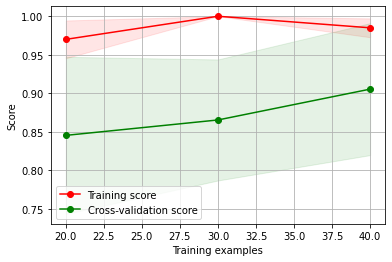

In [75]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
%matplotlib inline 

train_sizes, train_scores, valid_scores = learning_curve(svm.SVC(kernel='linear', C= 1), data, target, train_sizes=[1, 10, 25, 40], cv=5)

plt.xlabel("Training examples")
plt.ylabel("Score")

train_sizes=[1, 10, 20, 30, 40]

train_sizes, train_scores, test_scores = learning_curve(
    grid_clf, data, target, n_jobs=4, train_sizes=train_sizes)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")

plt.legend(loc="best")

### Synthèse  SVM
Les SVM sont appliqués à de très nombreux domaines. En effet, ces dernières possèdent des fondements mathématiques solides.  
La prédiction de la classe d'un échantillon donné est une décision rapide. La classification d’un nouvel exemple consiste à voir le signe de la fonction de décision  hθ(x) .
De plus, les exemples de test sont comparés juste avec les vecteurs supports et non pas avec tous les exemples d’apprentissage.

Cependant, ce modèle de classification est binaire de base d’où la nécessité d’utiliser l’approche un-contre-un. Et plus la quantité d’exemples en entrées est grande plus le calcul matriciel est complexe. Le temps de calcul est élevé lors d’une régularisation des paramètres de la fonction noyau.

# 3 - k plus proches voisins KNN
Les données utilisées dans cet exercice sont issues d'un recueil de chiffres écrits à la main par un groupe de 43 personnes,   
disponible ici, et importable directement dans le package 'datasets' de scikit-learn.
Ce sont des images en noir et blanc, normalisées, centrées et de taille 8x8 pixels. Les images sont données ici sous la forme   
de vecteurs unidimensionnels de taille 64 (pixels) dans l'attribut data, et sous la forme de tableaux de taille 8x8 dans   
l'attribut images. L'attribut target contient les labels correspondant à chaque image (un chiffre entre 0 et 9).


In [76]:
# (a) à (g)

In [77]:
# Import des bibliothèques nécessaires
from sklearn import neighbors
from sklearn import datasets
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np


digits = datasets.load_digits()

X_digits = pd.DataFrame(digits.data)
y_digits = digits.target

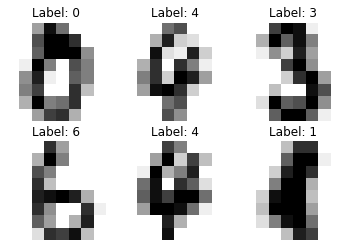

In [78]:
# (h) Exécuter la cellule suivante pour afficher aléatoirement six chiffres pixelisés présents dans les données.
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm # pour importer de nouvelles cartes de couleur

j=0

for i in np.random.choice(np.arange(0, len(y_digits)), size=6):
    j=j+1
#On stocke l'indice dans la liste i pour pouvoir afficher le label correspondant plus tard.
    
    plt.subplot(2,3,j)
# Rajouter *plt.subplot(2,3,j)* à chaque itération permet d'afficher toutes les images
# ensembles sur la même figure.

    plt.axis('off')
# Permet de supprimer les axes (ici sert à mieux voir les titres)
    
    plt.imshow(digits.images[i],cmap = cm.binary, interpolation='None')
# Affiche l'image n°i
# L'utilisation de cm.binary permet de voir les chiffres en gris sur fond blanc.

    plt.title('Label: %i' %y_digits[i])
# Pour chaque image on écrit en titre le label qui lui correspond. 

In [79]:
# (i) Diviser les matrices X_digits et y_digits en un ensemble d'apprentissage de 80% (X_train, y_train) et un ensemble de test (X_test, y_test) de 20%.
# Rajouter l'argument random_state = 126 dans la fonction train_test_split pour la reproductibilité du choix de l'aléatoire.
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, test_size=0.2, random_state=126)

## Apprentissage des données 
La méthode des K-plus proches voisins (KNN) est une méthode d'apprentissage supervisé extrêmement simple à implémenter dans sa forme la plus élémentaire 
et pourtant souvent performante pour des tâches de classification complexes. L'algorithme KNN ne s'entraîne sur aucune donnée, mais utilise à chaque fois 
toutes les données dont il dispose pour classifier une nouvelle donnée.

Le principe est le suivant : une donnée de classe inconnue est comparée à toutes les données stockées. La classe à laquelle est attribuée la nouvelle donnée 
est la classe majoritaire parmi ses K plus proches voisins au sens d'une distance choisie. Par défaut, la distance utilisée par la classe KNeighborsClassifier 
est la distance minkowski.

La figure ci-dessous illustre le fonctionnement d'un algorithme 3-NN. Pour une nouvelle entrée dont on veut prédire la classe. L'algorithme calcule les 3 voisins  
les plus proches de cette entrée et déduit la classe qui constitue la majorité de ces voisins afin d'en déduire la classe du nouveau point.

La fonction KNeighborsClassifier du package neighbors permet de créer un classifieur KNN en lui donnant en arguments, principalement le nombre de 
'voisins' n_neighbors choisi, et dans metric la distance à utiliser parmi celles comprises dans le package.

In [80]:
# (a) Exécuter la cellule suivante pour visualiser l'influence des hyperparamètres sur un modèle de K plus proche voisins.
"""
%matplotlib inline
from interactions import show_knn
show_knn()
"""

'\n%matplotlib inline\nfrom interactions import show_knn\nshow_knn()\n'

In [81]:
# (b) Créer un classifieur knn, avec k = 7 et la distance 'minkowski' (distance par défaut, avec p=2, distance euclidienne).
knn = neighbors.KNeighborsClassifier(n_neighbors=7, metric='minkowski')

In [82]:
# (c) Ajuster le classifieur sur l'ensemble d'entraînement (X_train et y_train).
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

## Évaluation du modèle de classification 
L’évaluation est la clé de la réussite en Data Science. Elle vise à vérifier le(s) modèle(s) ou les connaissances obtenues afin de s’assurer  
qu’ils répondent aux objectifs formulés au début du processus. Elle contribue aussi à la décision de déploiement du modèle ou à son amélioration.  
A ce stade, on teste notamment la robustesse et la précision des modèles obtenus.

In [83]:
# (a) Appliquer le modèle aux données de l'ensemble de test et stocker les prédictions obtenues dans la variable y_pred.
y_pred = knn.predict(X_test)

In [84]:
# (b) Afficher une matrice de confusion pour comparer les classes réelles et prédites.
pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])

Classe prédite,0,1,2,3,4,5,6,7,8,9
Classe réelle,,,,,,,,,,
0,32,0,0,0,0,0,0,0,0,0
1,0,54,0,0,0,0,0,0,0,0
2,0,0,38,0,0,0,0,0,0,0
3,0,0,0,28,0,0,0,0,0,0
4,0,0,0,0,41,0,0,0,0,0
5,0,0,0,0,0,40,1,0,0,2
6,0,0,0,0,0,0,35,0,0,0
7,0,0,0,0,0,0,0,27,0,0
8,0,0,0,0,0,0,0,0,34,0


Le modèle créé paraît déjà assez performant sur l'ensemble de test.
Sur 360 chiffres écrits testés, seuls trois chiffres 5 et quatre chiffres 9 ont été mal classés.

Le modèle peut cependant être amélioré, en choisissant une distance différente, ou un autre nombre de 'voisins'.²m

In [85]:
# (c) Créer un nouveau classifieur knn_m, avec k=5 et la distance 'manhattan'.
knn_m = neighbors.KNeighborsClassifier(n_neighbors=5, metric='manhattan')

In [86]:
# (d) Ajuster le nouveau classifieur sur l'ensemble d'entraînement (X_train et y_train).
knn_m.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan')

In [87]:
# (e) Calculer le score de performance ('accuracy') pour les deux modèles
#Score du modèle utilisant la distance de Minkowski
score_minkowski = knn.score(X_test, y_test)

#Score du modèle utilisant la distance de Manhattan
score_manhattan = knn_m.score(X_test, y_test)

score_minkowski, score_manhattan

(0.9805555555555555, 0.9833333333333333)

Même si cela peut paraître étonnant, les deux distances obtiennent exactement le même score.   
Cela signifie-t-il que ces deux distances sont autant adaptées à nos données ? Le choix du k est-il important ?
Le meilleur moyen de répondre à ces questions est de fournir une analyse graphique de la performance des modèles par métrique, en fonction du choix de k.

In [88]:
# (f) Créer trois listes score_minko, score_man, score_cheb, dans lesquelles vous stockerez les scores de 3 modèles utilisant 
# respectivement les matrices de Minkowski, Manhattan et Chebyshev, pour des valeurs de k allant de 1 à 40.
score_minko = []
score_man = []
score_cheb = []

for k in range(1, 41):
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    score_minko.append(knn.score(X_test, y_test))

for k in range(1, 41):
    knn = neighbors.KNeighborsClassifier(n_neighbors=k, metric='manhattan')
    knn.fit(X_train, y_train)
    score_man.append(knn.score(X_test, y_test))
    
for k in range(1, 41):
    knn = neighbors.KNeighborsClassifier(n_neighbors=k, metric='chebyshev')
    knn.fit(X_train, y_train)
    score_cheb.append(knn.score(X_test, y_test))

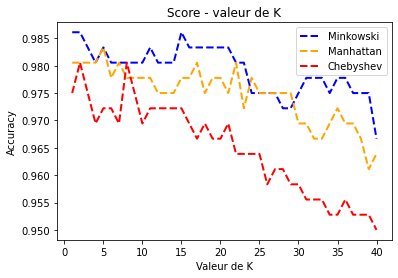

In [91]:
# (g) Afficher dans un graphique les listes créées en fonction de la valeur de k.
# (h) Utiliser des couleurs et légendes différentes pour différencier les métriques.
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(1, 41), score_minko, color='blue', linestyle='dashed', lw=2, label='Minkowski')
plt.plot(range(1, 41), score_man, color='orange', linestyle='dashed', lw=2, label='Manhattan')
plt.plot(range(1, 41), score_cheb, color='red', linestyle='dashed', lw=2, label='Chebyshev')
plt.title('Score - valeur de K')  
plt.xlabel('Valeur de K')  
plt.ylabel('Accuracy') 
plt.legend();

Les distances de Minkowski et de Manhattan donnent de meilleures performances lorsque k est petit (<10).  
La distance de Minkowski paraît plus stable, et son taux de bonnes prédictions ne décroît qu'à partir de k=20.
Le meilleur score absolu, est obtenu avec la distance de Minkowski pour un k=2 ; 3 ou 15.

Attention toutefois, l'échantillon test est relativement petit et l'échantillonnage des données donne une place importante à l'aléatoire, 
ces résultats peuvent donc varier si l'on sélectionne l'ensemble de test autrement. Il parait ainsi plus judicieux de choisir k = 3 qui en  
plus d'obtenir le meilleur score pour la distance de Minkowski, présente de bonnes performances sur les autres normes.

## Synthèse  KNeighborsClassifier()
L'algorithme k-NN est simple mais puissant. L'avantage est qu'il ne requiert aucun entraînement de modèle pour réaliser des prédictions, alors que c'est en général la partie la plus compliquée d'un algorithme de Machine Learning.
Il est utilisé dans de nombreux domaines, notamment : la reconnaissance de formes, les algorithmes de compression, le marketing ciblé.

En revanche, c'est un classifieur très gourmand en mémoire, sensible aux attributs non pertinents et corrélés.
Pour un jeu de données de grande dimension, la prédiction sera lente car l'algorithme parcourt, pour chaque individu à classer, l'ensemble des données de l'échantillon d'apprentissage.

# 4 - Arbres de décision 
Dans cet exercice nous allons étudier un exemple d'utilisation des arbres de décision sous Python. 
Les packages utilisés seront pandas, scikit-learn et ses sous-packages, notamment tree et model_selection.  
  
Un avantage majeur des arbres de décision est qu'ils peuvent être calculés automatiquement à partir de bases de données par des algorithmes d'apprentissage supervisé.
Ces algorithmes sélectionnent automatiquement les variables discriminantes à partir de données non-structurées et potentiellement volumineuses.  
Ils peuvent ainsi permettre d'extraire des règles logiques de cause à effet (des déterminismes) qui n'apparaissaient pas initialement dans les données brutes. 

0. Introduction au jeu de données 
Le jeu de données utilisé dans cet exercice provient de l'UCI ML Repositry) et contient des données calculées à partir d'images numérisées de masses mammaires.  
Elles décrivent les caractéristiques des noyaux cellulaires présents dans chaque image (rayon, périmètre, texture etc..) La première colonne donne le résultat   
du diagnostic de chaque masse cellulaire : 'B' pour bénigne, 'M' pour maligne.
L'objectif de l'exercice est de construire un modèle sous la forme d'un arbre de décision, pour prédire si une masse cellulaire est bénigne ou maline,  
en fonction des caractéristiques calculées à partir de l'image de sa biopsie.  

1. Préparation et modélisation des données 

In [93]:
# a) Charger la fonction train_test_split à partir du sous module sklearn.model_selection.
# (b) Charger la classe DecisionTreeClassifier à partir du sous-module sklearn.tree.
# (c) Charger la bibliothèque pandas sous le nom pd.
# (d) Lire le fichier breast_cancer.csv dans un DataFrame appelé bc_data
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

# bc_data = pd.read_csv('breast_cancer.csv', index_col=0)  # copie en excel pour moi

bc_data = pd.read_excel('df_1.xlsx')

In [94]:
bc_data.shape

(50, 31)

Aucune variable ne contient de valeurs manquantes.
Toutes les variables, à l'exception de 'diagnosis' sont des variables continues, mais les arbres de décisions fonctionnent aussi bien avec   
des variables discrètes ou qualitatives (après dichotomisation sur scikit-learn).   
Un coup d'oeil aux premières lignes du Data Frame nous montre que les différentes variables ne sont pas à la même échelle, mais très peu de    
"preprocessing" est nécessaire lors d'une classification par arbre de décision.   

In [95]:
# (f) Créer le Data Frame data contenant les différentes features et le vecteur target contenant la variable cible 'diagnosis'.
data = bc_data.drop('diagnosis', axis=1)
target = bc_data.diagnosis

In [96]:
target.shape

(50,)

## Construction d'un arbre de décision 
En Machine Learning, un arbre de décision peut être décrit comme une représentation visuelle d’un algorithme de classification  
de données suivant différents critères qu’on appelle décisions (ou nœuds).
Chaque nœud correspond à un test sur une variable d'apprentissage, et chacune des branches suivantes représente un résultat de ce test.  
Chaque feuille de l'arbre (nœuds terminaux) contient une valeur de la variable cible (un label dans le cas d'une classification).

Lors de l'entraînement du modèle, les nœuds sont créés à partir de tests "optimaux" par rapport à l'ensemble d'entraînement, et ce dernier   
prend fin lorsque les feuilles de l'arbres sont homogènes ou vérifient un certain critère d'arrêt.

Cet arbre de décision permet donc, après entraînement sur un ensemble de données, d'effectuer facilement des prédictions sous la forme de règles   
logiques successives de classification. Les résultats sont ainsi facilement interprétables et donc exploitables, la communication autour de la  
modélisation plus aisée. C'est donc un classifieur très apprécié et utilisé en entreprise.

La construction d'un arbre de décision se fait en principe en 2 phases :

La première phase consiste en la construction des nœuds :

À partir d'un ensemble d'apprentissage est enclenché un processus récursif de division de l’espace des données en sous échantillons de plus en plus  
pures en termes de classes, sur la base d'un critère prédéfini.  
Le problème de classification est ainsi décomposé en une suite de tests (imbriqués) portant sur une variable, de type "X>=seuil". 
Sur chaque nœud, le meilleur test est sélectionné d'après un certain critère (souvent basé sur la théorie de l'information, et notamment   
sur la notion d'entropie), dont l'objectif est de diminuer le plus possible le mélange des classes au sein de chaque sous-ensemble créé par   
les différentes alternatives du test.

En découle une succession de règles de classifications sous forme d'arbre dont chaque extrémité (ou "feuille") indique l'appartenance à une classe.  

La classe allouée à une feuille est déterminée par la classe majoritairement représentée parmi les données de l'ensemble d'apprentissage qui "tombent" dans cette feuille.  

L'objectif de cette phase est de générer une séquence hiérarchique de tests, aussi courte que possible, qui divise successivement l'ensemble  
des données d'apprentissage en sous-ensembles disjoints, tels que des sous-groupes de cas appartenant à la même classe soient rapidement détectés.

La seconde phase est celle d'élagage (ou "pruning") :

Elle consiste en la suppression des branches peu représentatives pour garder de bonnes performances prédictives. Cette étape nécessite la création  
d'un critère/ d'une métrique pour désigner les branches à élaguer, qui dépendera de l'algorithme utilisé.

Après élagage, les branches sont remplacées par des nœuds terminaux, labellisées sur base de la distribution des données d'apprentissage (classe majoritaire).  

De manière générale, le pruning se fait du bas vers le haut de l'arbre ("bottom-up"). Il se base sur une estimation (validation croisée,   
nouvel échantillon, estimation statistique, ...) du taux d'erreur de classification : un arbre est élagué à un certain nœud si le taux d'erreur  
estimé à ce nœud (en y allouant la classe majoritaire) est inférieur au taux d'erreur obtenu en considérant les sous-arbres terminaux.
L'élagage se prolonge successivement (au départ des extrémités) jusqu'à ce que tous les sous-arbres restants satisfassent la condition sur   
les taux d'erreur de classification.  

## Apprentissage des données 
La fonction DecisionTreeClassifier permet de créer un classifieur basé sur un arbre de décision. De nombreux paramètres peuvent lui être donnés comme le critère d'évaluation des partitions criterion, la profondeur maximale de l'arbre, le nombre de features à considérer à chaque nœud, etc.


Les jeux de données contiennent deux classes (points rouges/points bleus) avec x0 et x1 comme caractéristiques. La couleur du fond d'écran représente la probabilité d'appartenance à une des classes. Plus la couleur est rouge, plus la probabilité d'appartenance à la classe 2 est importante.

In [ ]:
# (a) Exécuter la cellule suivante pour visualiser l'influence des hyperparamètres sur un modèle d'arbre à décision.
"""
%matplotlib inline
from interactions import show_tree
show_tree()
"""

In [ ]:
# (b) Séparer le jeu de données en ensembles d'apprentissage et de test, de sorte que l'ensemble de test représente 20% des données totales. 
#     Rajouter l'argument random_state=123 dans la fonction train_test_split pour la reproductibilité du choix de l'aléatoire.
# (c) Créer une instance DecisionTreeClassifier appelée dt_clf, avec le critère criterion='entropy' et l'argument max_depth=4 pour 
#     spécifier le nombre maximum de points de séparation possible avant d'atteindre un nœud "feuille". À nouveau, ajouter l'argument random_state=123 
#     pour la reproductibilité des résultats.
# (d) Entraîner le classifieur sur l'ensemble d'entraînement.

In [206]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=123)

dt_clf = DecisionTreeClassifier(criterion ='entropy', max_depth=4, random_state=123)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=123)

In [ ]:
# (e) Appliquer le modèle aux données de l'ensemble de test et stocker les prédictions obtenues dans la variable y_pred.
# (f) Afficher une matrice de confusion pour comparer les classes réelles et prédites.

In [207]:
y_pred = dt_clf.predict(X_test)

pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])

Classe prédite,B,M
Classe réelle,,
B,1,4
M,0,5


Les prédictions faites sur l'échantillon test sont encourageantes.

Pour savoir quelles variables ont le plus déterminé le 'diagnostic' de chaque masse cellulaire, l'attribut feature_importances_ retourne  
l'importance normalisée de chaque variable dans la construction de l'arbre.

Dans scikit-learn l'importance est définie comme le décroissement total entre un nœud et les deux suivants du critère d'impureté utilisé  
pour diviser le nœud. Plus l'écart entre l'impureté calculée pour un nœud et ses nœuds 'fils' est élevé, plus la variable utilisée pour diviser le nœud est importante.

In [208]:
# (g) Afficher les 8 variables les plus importantes pour dt_clf, ainsi que leurs importances respectives.
feats = {}
for feature, importance in zip(data.columns, dt_clf.feature_importances_):
    feats[feature] = importance 
    
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Importance'})
importances.sort_values(by='Importance', ascending=False).head(8)
# avec le vrai data_set ona 8 autres => 0.62, 0.17, 0.06, 0.05, 0.04, ....

,Importance
perimeter_worst,1.0
radius_mean,0.0
texture_mean,0.0
symmetry_worst,0.0
concave points_worst,0.0
concavity_worst,0.0
compactness_worst,0.0
smoothness_worst,0.0


Deux mesures d'impureté peuvent être utilisées pour les arbres de décisions dans scikit-learn : l'Information Gain ou Entropy  
et l'index de Gini (plus de détails sur ces mesures ici).

En résumé, l'entropie vaut 0 si tous les échantillons d'un nœud appartiennent à la même classe, et l'entropie est maximale si  
nous avons une distribution de classe uniforme (i.e. lorsque toutes les classes du nœud ont une probabilité égale).

L'index de Gini est similaire à l'entropie, mais le choix du critère utilisé donne parfois des classifications différentes.

In [209]:
# (h) Créer un classifieur dt_clf_gini, ayant pour paramètres : criterion='gini' , max_depth=4 et random_state=321.
# (i) Entraîner le nouveau modèle sur l'ensemble d'entraînement (X_train et y_train).
# (j) Sauvegarder les prédictions du modèle sur X_test dans y_pred.
# (k) Afficher la matrice de confusion correspondante.
dt_clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=321)
dt_clf_gini.fit(X_train, y_train)
y_pred = dt_clf_gini.predict(X_test)
pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])

Classe prédite,B,M
Classe réelle,,
B,1,4
M,0,5


In [210]:
# (l) Afficher, comme pour le modèle précédent, les huit variables les plus importantes, ainsi que leurs importances respectives.
feats = {}
for feature, importance in zip(data.columns, dt_clf_gini.feature_importances_):
    feats[feature] = importance 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})

#Affichage des 8 variables les plus importantes
importances.sort_values(by='Gini-importance', ascending=False).head(8)

,Gini-importance
perimeter_worst,1.0
radius_mean,0.0
texture_mean,0.0
symmetry_worst,0.0
concave points_worst,0.0
concavity_worst,0.0
compactness_worst,0.0
smoothness_worst,0.0


Les arbres correspondant aux classifieurs crées peuvent être affichés grâce à la fonction plot_tree.  
La visualisation de l'arbre est importante pour comprendre comment le modèle fonctionne, et comment potentiellement l'améliorer   
(retirer une variable qui favorise le sur-apprentissage par exemple).

Voici les arbres correspondant aux deux modèles créés :

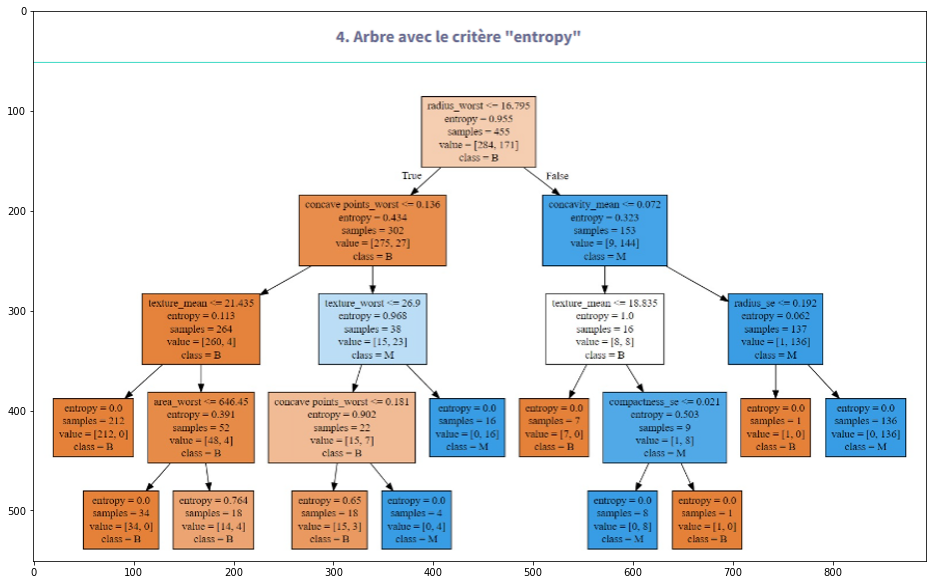

In [218]:
from matplotlib import image

img = image.imread('entropie.png')
plt.figure(figsize=(16, 12))
plt.imshow(img)

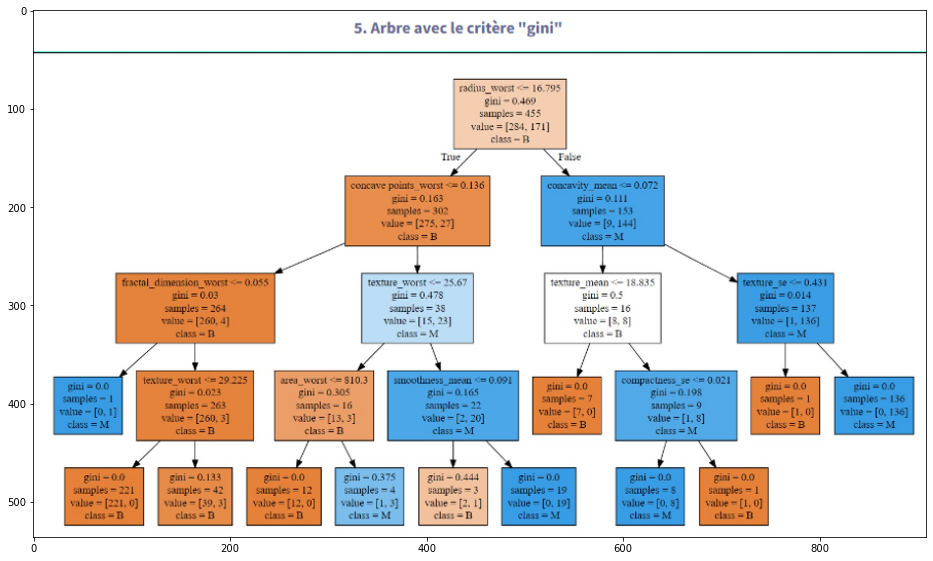

In [219]:
img = image.imread('gini.png')
plt.figure(figsize=(16, 12))
plt.imshow(img)

Le premier sommet est la racine de l’arbre. Il est situé sur le premier niveau.  
L'arbre contient la distribution en fréquence de la variable à prédire diagnostic. 455 variables sont utilisées pour la construction de l'arbre.

Dans les deux cas la variable radius_worst est la première variable utilisée. Elle est nommée la variable de segmentation.  
Elle produit donc deux nœuds fils, et ainsi de suite, jusqu'à l'obtention d'une classe pure, où jusqu'à ce que le nombre de nœuds créés atteigne  
le nombre maximal autorisé (ici égal à 4).

## Synthèse 
Les algorithmes basés sur les arbres de décision permettent de répondre simplement et rapidement à un problème de classification.  
Ils ne formulent pas d'hypothèses au sujet des données et ne sont pas affectés par les problèmes d'échelles de mesure des variables.
Ils peuvent gérer à la fois des variables numériques et catégorielles, et s'avèrent facilement interprétables.

Les modèles à base d'arbres de décision peuvent s'avérer cependant assez instables : ils sont sensibles aux variations (même assez faibles) de l'ensemble 
d'apprentissage en termes d'échantillons ou de variables considérées.
Parfois, les arbres de décision sont également très complexes, et généralisent mal l'ensemble d'apprentissage (surapprentissage, overfitting en anglais). 
Des procédures d'élagage supplémentaires sont utilisées pour contourner ce problème, certaines approches comme les forêts aléatoires permettent de s'en affranchir.

# 5 - Boosting et de Bagging / multi-classes !
Les méthodes de bagging et de boosting sont des "méta-algorithmes" dont l'approche est de combiner plusieurs algorithmes d'apprentissage automatique  
en un modèle prédictif, afin de réduire leur variance ou leur biais, et d'améliorer la performance finale.

Les deux méthodes fonctionnent de manière similaire, et consistent en 2 étapes principales :

1) Construire différents modèles de Machine Learning simples sur des sous-ensembles des données d'origine.

2) Produire un nouveau modèle à partir de l'assemblage des précédents.

1. Le Boosting
Le Boosting est un ensemble de méthodes visant essentiellement à réduire le biais de modèles de Machine Learning simples et faibles et les convertir 
en un modèle stable et puissant.

Le principe général du boosting consiste à construire une famille d’estimateurs "faibles" construits de manière récursive, qui sont ensuite agrégés par  
une moyenne pondérée des estimations (en régression) ou un vote à la majorité (en classification).
Par faible, il est sous-entendu une règle de décision dont le taux d’erreur est légèrement meilleur que celui d’une règle purement aléatoire.

Chaque estimateur est une version améliorée du précédent, qui vise à donner plus de poids aux observations mal ajustées ou mal prédites. Ainsi à chaque itération,  
l'évaluation de l'estimateur permet un ré-échantillonnage des données, avec un poids plus important donné aux observations mal prédites. L’estimateur construit 
à l’étape i concentrera donc ses efforts sur les observations mal ajustées par l’estimateur à l’étape i − 1.
Enfin les classifieurs sont combinés, et pondérés par des coefficients associés à leurs performances predictives respectives.

Il existe de très nombreux algorithmes de Boosting.
Le plus populaire est l'algorithme AdaBoost (pour Adaptive Boosting) développé par Freund & Schapire (1997).
Son fonctionnement est le suivant :

- On choisit une règle de classification "faible". L’idée consiste à appliquer cette règle plusieurs fois en affectant judicieusement un poids différent aux observations 
à chaque itération.
- Les poids de chaque observation sont initialisés à  1n1n  ( nn  étant le nombre d'observations) pour l’estimation du premier modèle.
Ils sont ensuite mis à jour pour chaque itération. L’importance d’une observation est inchangée si l’observation est bien classée ; dans le cas contraire elle augmente 
avec la qualité d’ajustement mesurée du modèle.
- L’agrégation finale est une combinaison des estimateurs obtenus pondérée par les qualités d’ajustement de chaque modèle.
Le package sklearn.ensemble permet d'implémenter l'algorithme AdaBoost dans le cas de la classification multi classe, notamment grâce à la classe AdaBoostClassifier 
qui permet de créer un classifieur utilisant par défaut un arbre de décision simple comme règle de classification initiale.

In [111]:
### Dans la suite de l'exercice on utilisera le jeu de données 'letter-recognition.csv' qui contient certaines caractéristiques propres 
### à des images représentant l'une des 26 lettres capitales de l'alphabet latin, ainsi que la colonne 'letter' contenant la lettre en question.

In [37]:
# (a) à (f) charger les librairies
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import pandas as pd
import numpy as np

In [38]:
# (g) Lire le fichier 'letter-recognition.csv' dans un DataFrame df.
# (h) Afficher les informations concernant les colonnes de df.
df = pd.read_excel('letter-recognition.xlsx')
#df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  50 non-null     object
 1   x-box   50 non-null     int64 
 2   y-box   50 non-null     int64 
 3   width   50 non-null     int64 
 4   high    50 non-null     int64 
 5   onpix   50 non-null     int64 
 6   x-bar   50 non-null     int64 
 7   y-bar   50 non-null     int64 
 8   x2bar   50 non-null     int64 
 9   y2bar   50 non-null     int64 
 10  xybar   50 non-null     int64 
 11  x2ybr   50 non-null     int64 
 12  xy2br   50 non-null     int64 
 13  x-edge  50 non-null     int64 
 14  xegvy   50 non-null     int64 
 15  y-ege   50 non-null     int64 
 16  yegvx   50 non-null     int64 
dtypes: int64(16), object(1)
memory usage: 6.8+ KB


In [39]:
# Les features de chaque lettre sont stockées dans les 16 derniers attributs de df, la variable cible dans l'attribut letter.

# (i) Séparer les features dans un DataFrame nommé data, et la variable cible dans target.
target = df.letter
data = df.iloc[:,1:]   # ou bien    data = df.drop('letter', axis=1)
data.head()

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-edge,xegvy,y-ege,yegvx
0,4,5,5,6,4,8,8,5,2,8,8,10,3,9,5,7
1,4,7,5,6,6,6,5,4,5,7,5,11,5,10,7,11
2,4,9,6,6,5,5,10,4,6,10,10,6,2,10,3,6
3,3,4,4,5,3,8,8,7,3,5,7,10,3,9,5,10
4,6,9,8,8,7,7,5,4,5,9,3,7,4,8,6,9


In [52]:
target.head(10)

0    Q
1    C
2    F
3    Q
4    O
5    C
6    O
7    N
8    P
9    U
Name: letter, dtype: object

In [40]:
# (j) Séparer les datasets en en un jeu d'apprentissage et un jeu de test. La taille du jeu de test doit correspondre à 30 % de la quantité totale des données disponibles.
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=5)

## 1er model par arbre de décision

In [41]:
# La construction des arbres de décision comme modèle de classification se fait en spécifiant la profondeur maximale max_depth 
# (il y a d'autres paramètres qu'il est possible de donner, tels que le critère d'évaluation des partitions, voir la documentation pour plus d'informations).

#(a) Créer un modèle de classification dtc, ayant pour paramètre max_depth=5, en utilisant la méthode DecisionTreeClassifier.
#(b) Entraîner l'algorithme sur l'ensemble d'entraînement (X_train et y_train).
dtc = DecisionTreeClassifier(max_depth=5)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [42]:
# En premier lieu, l'évaluation du modèle sera faite en calculant sa précision moyenne sur l'ensemble des données de test.

# (a) Calculer le taux de bonnes prédictions du modèle de classification sur l'ensemble de test en utilisant la méthode score.

score_dtc = dtc.score(X_test, y_test)
score_dtc

0.2

In [43]:
# Le taux de bonne prédiction est relativement faible. Pour une meilleure clarté des prédictions effectuées, il convient d'afficher une matrice de confusion.

# (b) Effectuer les prédictions du modèle sur X_test, et afficher la matrice de confusion correspondante
y_pred = dtc.predict(X_test)
pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])

Classe prédite,B,E,O,P,V,Y
Classe réelle,,,,,,
C,0,0,0,1,0,0
F,0,1,0,0,1,1
J,0,1,0,0,0,0
L,0,1,0,0,0,0
N,0,1,0,0,1,0
O,1,0,1,0,0,0
P,0,0,0,1,0,0
Q,1,1,0,0,0,0
V,0,0,0,0,0,1


## Algorithme de Boosting
Scikit-learn permet l'application d'Adaboost comme algorithme de Boosting.
L'objectif de cette partie est de créer un nouveau modèle de classification à partir de séquences d'arbres de décisions comme dtc défini plus haut.

In [44]:
# (a) Créer de nouveau un classifieur ac, ayant pour paramètres : base_estimator=dtc, et n_estimators=400, en utilisant la classe AdaBoostClassifier du package ensemble.
# (b) Entraîner l'algorithme sur l'ensemble (X_train, y_train).
# (c) Calculer l'accuracy (taux de bonnes prédiction) du nouveau modèle de classification sur l'échantillon de test.

ac = AdaBoostClassifier(base_estimator=dtc, n_estimators=400)
ac.fit(X_train, y_train)
ac.score(X_test, y_test)  # -> donne 0.2 = 20% très mauvais mais 78% survrai data_set car j'ai que 50 lignes....

0.2

In [45]:
# (d) Afficher la matrice de confusion de l'ensemble de test.
y_pred = ac.predict(X_test)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'])

Predicted,E,G,O,P,S,V,Y
True,,,,,,,
C,0,0,0,0,1,0,0
F,0,0,0,0,1,1,1
J,1,0,0,0,0,0,0
L,1,0,0,0,0,0,0
N,1,0,0,0,0,1,0
O,0,1,1,0,0,0,0
P,0,0,0,1,0,0,0
Q,0,0,0,0,2,0,0
V,0,0,0,0,0,0,1


Les résultats obtenus sont sensiblement meilleurs qu'avec l'arbre de décision simple.  
Adaboost est un algorithme applicable à de nombreux domaines par un bon choix de classificateurs de base. Cette technique est adaptée   
aux problèmes multi-étiquettes et permet de bien classifier les exemples aberrants (outliers en anglais).

## Le Bagging ou Bootstrap AGGregatING
Le terme **Bagging** vient de la contraction de **Bootsrap Aggregating**, il regroupe un ensemble de méthodes introduites par Léo Breiman (1996)  
visant à réduire la variance et à augmenter la stabilité des algorithmes de Machine Learning utilisés pour la classification ou la régression.

La méthode générale du Bagging consiste principalement en l'entraînement d'un modèle sur différents sous-ensembles de même taille que l'échantillon initial,  
par la technique de Bootstrap, c'est à dire de **tirage aléatoire avec remise**.  
La méthode construit donc un ensemble d'**estimateurs indépendants**, contrairement au Boosting, qui sont par la suite agrégés (ou baggés) en un méta-modèle,  
avec un vote majoritaire pour la classification, et une moyenne pour la régression.

Contrairement au Boosting, choisir un grand nombre d'estimateurs n'entraînera pas de risque supplémentaire d'overfitting.
En effet, plus le nombre d'estimateur est élevé, plus le biais du modèle final sera équivalent à la moyenne de biais agrégés et la variance diminuera   
d’autant plus que les estimateurs que l’on agrège seront décorrélés. On aura donc tout intérêt à choisir un nombre d'estimateurs le plus élevé possible,   
en fonction du temps que l'on souhaite accorder au processus d'entraînement.

- Pour que le bagging ait un sens, il faut donc que les estimateurs choisis soient vulnérables à des variations de l’échantillon d'origine par bootstrap.   
Les arbres de régression et de classification sont connus pour être particulièrement instables et sont par conséquent, les estimateurs idéals pour le bagging.  
La plupart des algorithmes utilisent d'ailleurs des arbres par défaut dans leurs procédures de Bagging.

L'erreur de prédiction calculée, en général, pour les méthodes de Bagging est l'erreur dite **Out Of Bag (OOB)**, c'est-à-dire que pour chaque observation on calcule  
la moyenne des erreurs pour tous les modèles entraînés sur un échantillon bootstrapé dont elle ne fait pas partie. Cette technique aide à prévenir l'over-fitting.

La classe BaggingClassifier du package sklearn.ensemble permet de créer un classifieur en utilisant l'algorithme de Bagging à partir d'arbres de classification par défaut.

In [46]:
# (a) Importer BaggingClassifier depuis sklearn.ensemble.
# (b) Créer un nouveau classifieur bc, ayant pour paramètres : n_estimators=1000, et oob_score=True pour calculer l'erreur Out Of Bag.
# (c) Entraîner l'algorithme sur l'ensemble d'entraînement (X_train et y_train).
# (d) Afficher l'erreur Out Of Bag du modèle grâce à l'attribut oob_score_.

from sklearn.ensemble import BaggingClassifier
bc = BaggingClassifier(n_estimators=1000, oob_score=True)
bc.fit(X_train, y_train)
bc.oob_score_  # -> ici 0.4=40%, sur vrai data_set -> 0.94 = 94%

0.4

In [47]:
# (e) Calculer l'accuracy (taux de bonnes prédiction) du nouveau modèle de classification sur l'échantillon de test.
bc.score(X_test, y_test)

0.4

In [48]:
# (f) Afficher la matrice de confusion de l'ensemble de test.
y_pred = bc.predict(X_test)
pd.crosstab(y_test, y_pred)

col_0,C,E,G,H,L,O,P,V,Y
letter,,,,,,,,,
C,1,0,0,0,0,0,0,0,0
F,0,0,1,0,0,0,0,1,1
J,0,1,0,0,0,0,0,0,0
L,0,0,0,0,1,0,0,0,0
N,0,0,0,1,0,0,0,1,0
O,0,0,0,0,0,2,0,0,0
P,0,0,0,0,0,0,1,0,0
Q,1,0,0,0,0,1,0,0,0
V,0,0,0,0,0,0,0,0,1


In [49]:
y_pred

array(['Y', 'H', 'O', 'E', 'Y', 'V', 'V', 'Y', 'C', 'G', 'C', 'O', 'P',
       'O', 'L'], dtype=object)

Les résultats obtenus avec le Bagging sont encore largement supérieurs à ceux des premiers modèles.

Le Bagging est une méthode d'ensemble simple et robuste réduisant la variance quand les prédicteurs sont instables.   
Son estimation de l'erreur de prédiction par Bootstrap prévient l'over-fitting.

L'utilisation du Bagging est adaptée aux algorithmes à fortes variance qui sont ainsi stabilisés, notamment les réseaux neuronaux et les arbres de décision.
Cependant, il peut également dégrader les qualités pour des algorithmes plus stables, par exemple la méthode des  kk  plus proches voisins, ou la régression linéaire

## Synthèse 
Pour conclure, les méthodes de Bagging et de Boosting sont similaires sur le fond mais bien différentes sur la forme. En effet le Bagging et le Boosting :

sont toutes deux des méthodes d'ensemble qui produisent un nombre N d'estimateurs pour en obtenir un, mais alors qu'ils sont indépendants pour le Bagging, le Boosting crée des modèles qui s'améliorent itérativement en insistant là où les modèles précédents ont échoué.
génèrent différents jeux de données par ré-échantillonnage, mais alors que le ré-échantillonnage est totalement aléatoire pour le Bagging, le Boosting calcule des poids différents pour sélectionner à chaque étape les observations les plus difficiles à prédire.
déterminent toutes deux la décision finale en effectuant un vote de majorité ou une moyenne sur les N estimateurs, mais la moyenne est équipondérée pour le Bagging, et pondérée par des coefficients relatifs à la performance des estimateurs pour le Boosting.
sont efficaces pour réduire la variance et apporter une plus grande stabilité, mais seul le Boosting tente de réduire le biais, tandis que le Bagging est meilleur pour éviter l'overfitting que le Boosting peut parfois créer.

# 6 - Les forêts aléatoires 
Dans cet exercice, nous allons étudier un exemple d'utilisation des forêts aléatoires sous Python.
Les packages utilisés seront pandas, scikit-learn et ses sous-packages, notamment ensemble et model_selection.

Introduction au jeu de données 
Le jeu de données utilisé dans cet exercice provient de **données d'une entreprise de télécommunications** et contient des informations sur les services  
utilisés et la consommation de 3333 clients.
La colonne **'churn' identifie les clients qui ont résilié leur contrat** avec la compagnie de télécommunication dans un délai de 6 mois après avoir récolté ces données.
Le terme "churn", très utilisé en marketing, signifie la perte de clientèle ou d'abonnés.

L'objectif de cet exercice est de réaliser un modèle, à partir d'une forêt aléatoire, pour prédire l'éventuel départ de clients de la compagnie dans un délai de 6 mois.

In [6]:
# 1. Préparation et modélisation des données 
# (a) Charger le package ensemble à partir de la bibliothèque sklearn.
# (b) Charger le package train_test_split à partir de la bibliothèque sklearn.model_selection.
# (c) Charger la bibliothèque pandas sous le nom pd.
# (d) Lire le fichier churn_dataset.csv dans un DataFrame appelé churn_df.

In [12]:
# Import des bibliothèques nécessaires
from sklearn import ensemble
from sklearn.model_selection import train_test_split
import pandas as pd


# Lecture du fichier 'churn_dataset.csv'
churn_df = pd.read_csv('churn_dataset.csv', sep=';')

In [13]:
churn_df.info()  # vrai data_set (3333 , 21) aucun NaN partout

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   60 non-null     object 
 1   account length          60 non-null     int64  
 2   area code               60 non-null     int64  
 3   phone number            60 non-null     object 
 4   international plan      60 non-null     object 
 5   voice mail plan         60 non-null     object 
 6   number vmail messages   60 non-null     int64  
 7   total day minutes       60 non-null     float64
 8   total day calls         60 non-null     int64  
 9   total day charge        60 non-null     float64
 10  total eve minutes       60 non-null     float64
 11  total eve calls         60 non-null     int64  
 12  total eve charge        60 non-null     float64
 13  total night minutes     60 non-null     float64
 14  total night calls       60 non-null     int6

In [14]:
churn_df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,WY,106,415,338-6018,yes,yes,26,270.3,111,45.95,...,90,18.29,254.0,133,11.85,7.7,6,2.08,3,False
1,VA,74,408,416-5341,no,no,0,165.3,120,28.10,...,106,16.87,208.5,102,7.88,9.2,4,2.48,2,False
2,WV,131,415,362-5044,no,no,0,196.1,89,33.34,...,87,15.77,250.0,132,8.67,11.7,2,3.16,3,True
3,AL,91,408,348-9383,yes,no,0,151.8,115,25.81,...,116,8.81,156.3,86,7.63,12.9,3,3.48,1,False
4,TN,108,408,352-1127,no,yes,15,165.1,85,28.07,...,93,22.70,250.7,114,5.72,9.4,5,2.54,4,False


In [ ]:
# (f) Séparer dans target, la colonne churn de churn_df.
# (g) Transformer la variable international plan en variables indicatrices et les ajouter aux colonnes de churn_df.
# (h) Transformer la variable voice mail plan en variables indicatrices et les ajouter aux colonnes de churn_df.
# (i) Créer le DataFrame data à partir de chun_df après avoir supprimé les variables 'international plan', 'voice mail plan', 'state','area code', 'phone number' et 'churn'.

In [16]:
target = churn_df['churn']

churn_df = churn_df.join(pd.get_dummies(churn_df['international plan'], prefix='international'))
churn_df = churn_df.join(pd.get_dummies(churn_df['voice mail plan'], prefix='voicemail'))

to_drop = ['international plan', 'voice mail plan', 'state', 'area code', 'phone number', 'churn']
data = churn_df.drop(to_drop,axis=1)

In [ ]:
# (j) Séparer le jeu de données en ensembles d'apprentissage et de test, de sorte que l'ensemble de test représente 20% des données totales.
# (k) Rajouter l'argument random_state=12 dans la fonction train_test_split pour la reproductibilité du choix de l'aléatoire.

In [17]:
# Création d'un ensemble d'entraînement et d'un ensemble test
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=12)

## n_jobs : calculs parallèles sur nos noyaux pc
Apprentissage des données 
Les algorithmes de forêts aléatoires sont un cas particulier du Bagging appliqué aux arbres de décision (CART).
En plus du principe de Bagging, les forêts aléatoires ajoutent de l'aléa au niveau des variables. Pour chaque arbre on sélectionne un sous-échantillon par bootstrap d'individus et à chaque étape, la construction d'un nœud de l'arbre se fait sur un sous-ensemble de variables tirées aléatoirement.

Le principe de fonctionnement des forêts aléatoires est simple : de nombreux petits arbres de classification sont produits sur une fraction aléatoire de données.
Random Forest fait ensuite voter ces arbres de classification peu corrélés afin de déduire l'ordre et l'importance des variables explicatives.

Le module ensemble permet de construire des arbres en parallèle à travers le paramètre n_jobs. Ce nombre entier précise le nombre de calculs qui seront traités de façon simultanée et si n_jobs = -1, tous les noyaux disponibles sur la machine seront utilisés.

In [30]:
# Création du classificateur et construction du modèle sur les données d'entraînement
clf = ensemble.RandomForestClassifier(n_jobs=-1, random_state=321)
clf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=321)

In [31]:
# (c) Prédire les données de l'ensemble de test et les stocker dans la variable y_pred.
# (d) Afficher la matrice de confusion de l'échantillon test

In [32]:
y_pred = clf.predict(X_test)
pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])
# vraies données FN = 573, FP = 1 , VN = 17 et VP = 76  # ici pb aucun classement prédit en positif....car y_pred ne donne personne en True
# cible = churn = désabonnés

Classe prédite,False
Classe réelle,
False,10
True,2


In [33]:
y_pred

array([False, False, False, False, False, False, False, False, False,
       False, False, False])

La matrice de confusion ci-dessus nous montre que le modèle performe dans la prédiction des clients qui ne se désabonnent pas.
En revanche, celui-ci éprouve des difficultés à classer des clients qui se sont bel et désabonnés.

Le modèle n'a donc pas de haute performance au premier abord pour trouver les "churners" potentiels, même si le taux de bonnes prédictions du modèle reste très bon grâce à la petite proportion de "churners" dans les données.

In [25]:
# (e) Calculer le taux de bonnes prédictions de la classification à l'aide de la fonction score.
clf.score(X_test, y_test)


0.8333333333333334

In [29]:
# (f) Calculer les probabilités pour X_test d'appartenir à chacune des deux classes. Stocker ensuite ces probabilités dans la variable y_probas. 
# On utilisera la méthode predict_proba()).
y_probas = clf.predict_proba(X_test)
y_probas

array([[0.98, 0.02],
       [0.9 , 0.1 ],
       [0.82, 0.18],
       [0.88, 0.12],
       [0.95, 0.05],
       [0.85, 0.15],
       [0.97, 0.03],
       [0.85, 0.15],
       [0.88, 0.12],
       [0.79, 0.21],
       [0.86, 0.14],
       [0.97, 0.03]])

## Courbe de Gain = lift cumulé
Une manière différente d'évaluer la performance de notre modèle est la création d'une courbe lift cumulée (ou courbe de gain)

En marketing, pour promouvoir un produit, pour fidéliser un client, ou comme ici pour empêcher des clients de se désabonner à un service, il existe ce que l'on appelle des campagnes de ciblage.
L'objectif étant de contacter un nombre de personnes le plus petit possible, tout en maximisant le nombre de clients qui vont répondre positivement à l'opération.

Dans notre exemple, l'entreprise cherche à savoir quels clients vont se désabonner dans un futur proche, car elle ne peut contacter tous ses clients, pour leur proposer, par exemple, une offre pour les retenir.
Une solution est donc de créer un modèle qui retourne un score (le plus souvent les probabilités d'appartenir à une classe) pour chaque individu, et de les trier de manière décroissante selon ce score. Ainsi les premiers 10% des clients ainsi classés sont les 10% ayant le plus de chance de se désabonner du service.

La courbe lift cumulée, ou courbe de gain, permet de connaître, grâce à l'échantillon test, le pourcentage de "churners" qui seront atteints, en fonction d'une taille de cible choisie.

La fonction plot_cumulative_gain() du sous module metrics du package scikitplot permet d'afficher une courbe de gain cumulée très facilement. Il suffit de lui donner en argument, le vecteur des labels réels de l'échantillon de test, et celui des prédictions faites par modèle

In [ ]:
# (g) Importer matplotlib.pyplot sous le diminutif plt.
# (h) Importer scikitplot sous le diminutif skplt.
# (i) Afficher la courbe de gain cumulée avec y_test et y_probas.

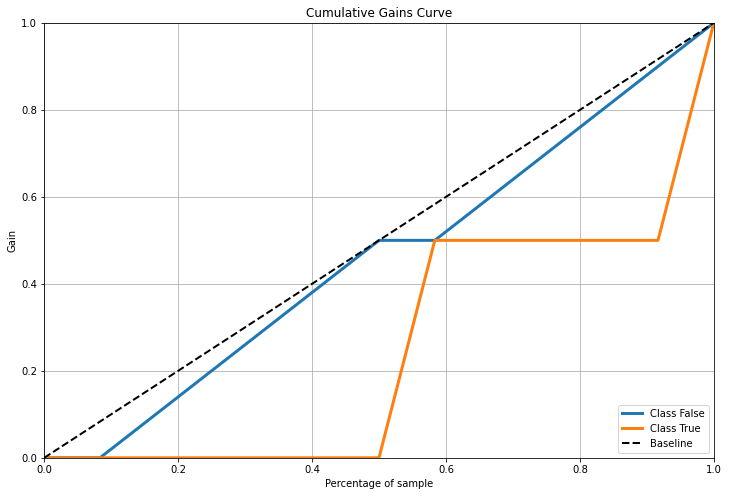

In [28]:
import matplotlib.pyplot as plt
import scikitplot as skplt

skplt.metrics.plot_cumulative_gain(y_test, y_probas, figsize=(12,8))
plt.show()    # GRAPH COMPLETEMENT DIFFERENT SUR VRAI DATASET=> LES 2 COURBES SONT AU DESSUS DE Y=X , la bleu est proche de y= x et la orange monte très vite pour plafonner à 1

L'axe horizontal représente les individus de l'échantillon test (667), l'axe vertical les "churners" (95).

La courbe montre qu'en ciblant, par exemple, uniquement les 20% des clients ayant obtenu le meilleur score par le modèle (c'est à dire les 20% des clients avec la plus forte probabilité de se désabonner), plus de 90% des "churners" en devenir seront ainsi atteints, alors qu'en sélectionnant 20% des clients de manière aléatoire, seuls 20% des "churners" seront atteints.
Cette méthode permet de cibler plus facilement, et à moindre coût, les clients/consommateurs susceptibles de stopper leur abonnement.

La courbe lift cumulée est donc un outil très utile pour des opérations de ciblage, pour réduire les coûts d'une opération et maximiser le rendement.

## Synthèse 
Les forêts aléatoires présentent de multiples avantages par rapport à d'autres modèles de classification :

- Ce sont des modèles de classification multi-classe, efficaces sur les données de grande dimension.
- Il s'agit de méthodes statistiques robustes au niveau de l'identification des valeurs aberrantes (outliers en anglais).
- De manière générale, elles évitent l'overfitting, et ne nécessitent pas de validation croisée grâce aux échantillons "Out of bag".
Cependant, les modèle de Random Forest ont souvent un temps d'apprentissage plus long que les modèles classiques, et sont difficilement interprétables.

# 7 - Voting Classifier & Staking
Dans cet exercice, nous allons présenter deux nouvelles méthodes d'ensemble : le Voting Classifier et le Stacking.
Contrairement au Bagging ou au Boosting, l'objectif de ces méthodes est d'assembler une collection d'estimateurs forts et déjà performants afin de profiter des avantages particuliers de chacun.

- **Voting Classifier**  
Le Voting Classifier est un meta-classifieur de scikit-learn permettant de combiner plusieurs estimateurs de Machine Learning, similaires ou conceptuellement différents.
Précisément, il s'agit de constituer un collège d'experts qui est représenté par des modèles comme les arbres de décision, la méthode des  kk  plus proches voisins ou la régression logistique, puis de les faire voter.
La classe VotingClassifier de scikit-learn permet de réaliser un vote 'hard' ou 'soft'.

  - Dans le vote 'hard', chaque modèle de classification prédit un label, et le label final produit est celui prédit le plus fréquemment.
  - Dans le vote 'soft', chaque modèle retourne une probabilité pour chaque classe, et la moyenne des probabilités est calculée pour prédire la classe finale (seulement recommandé si les classifieurs sont bien calibrés).
Dans les deux cas, il est possible d'affecter un poids à chaque estimateur, permettant de donner plus d'importance à un ou plusieurs modèles.

- **Stacking**  
Le Stacking est une méthode d'ensemble dont le principe est l'entraînement simultané de divers algorithmes de Machine Learning dont les résultats sont ensuite utilisés pour entraîner un nouveau modèle qui permet de combiner de manière optimale les prédictions des premiers estimateurs.
Cette méthode repose sur la technique suivante :

  - La première étape consiste en la spécification d'une liste de L algorithmes de base et des paramètres correspondant, ainsi que de l'algorithme de meta-apprentissage.
  - Chacun des L algorithmes est ensuite entraîné sur l'ensemble d'entraînement, contenant N observations.
  - Une procédure de validation croisée permet d'obtenir les prédictions de chacun des modèles pour les N observations.
  - L'algorithme de méta-apprentissage est ensuite entraîné sur ces données collectées et effectue de nouvelles prédictions.
Le modèle d'ensemble consiste finalement en l'ensemble des L algorithmes de base et du modèle de méta-apprentissage et peut être utilisé pour générer des prédictions sur un nouveau jeu de données.

Le jeu de données utilisé dans la suite concerne le syndrome du diabète, et l'objectif est d'inférer les personnes susceptibles d'être diabétiques à partir de mesures diagnostiquées qui peuvent influencer l'apparition du diabète. Les données que nous allons traiter contiennent huit variables explicatives et une variable cible :

- **Champ	           Description**
- Pregnancies	       Le nombre de grossesse
- Glucose	           Concentration plasmatique de glucose à 2 heures dans un test de tolérance au glucose par voie orale
- BloodPressure	       Pression artérielle diastolique ( mm Hgmm Hg )
- SkinThickness	       Épaisseur du pli cutané du triceps ( mmmm )
- Insulin	           Insuline sérique de 2 heures ( mu U / mlmu U / ml )
- BMI	               Indice de masse corporelle ( poids en kg / (hauteur en m)2poids en kg / (hauteur en m)2 )
- DiabetesPedigree..   Fonction de pedigree du diabète
- Age	               Age (années)
- Outcome	           Variable de classe (0 or 1)
Le principal objectif sera d'utiliser les méthodes d'Ensemble ci-dessus pour pouvoir classer un ensemble d'individus de Nord-Amérindiens en deux groupes : diabétique et non diabétique.

Le dataset choisi est ici volontairement de petite dimension (768 observations), afin de réduire le temps de calcul des différentes fonctions.

In [53]:
# (a) Charger les classe VotingClassifier et StackingClassifier, à partir de sklearn.ensemble.
# (b) Charger les fonction train_test_split, cross_validate et KFold à partir de sklearn.model_selection.
# (c) Charger la fonction f1_score à partir de la bibliothèque sklearn.metrics.
# (d) Charger la classe LogisticRegression à partir de sklearn.linear_model.
# (e) Charger la classe RandomForestClassifier à partir de sklearn.ensemble.
# (f) Charger le package KNeighborsClassifier à partir de sklearn.neighbors.
# (g) Charger la bibliothèque pandas sous le nom pd.
# (h) Lire le fichier diabetes.csv dans un DataFrame appelé df et afficher les premières lignes

In [55]:
# Import des bibliothèques nécessaires
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

import pandas as pd

# Lecture du fichier 'diabetes.csv'
df = pd.read_csv('diabetes.csv', sep=';')

# Affichage des trois premières lignes du DataFrame 'df'
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,107,60,25,0,26.4,0.133,23,0
1,9,145,88,34,165,30.3,0.771,53,1
2,4,114,65,0,0,21.9,0.432,37,0
3,0,105,68,22,0,20.0,0.236,22,0
4,1,157,72,21,168,25.6,0.123,24,0


In [56]:
data = df.drop('Outcome', axis=1)
target = df['Outcome']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=4)

(a) Créer les trois classifieurs suivants nommés respectivement clf1, clf2 et clf3 :
Un modèle de classe KNeighborsClassifier, avec 3 voisins (n_neighbors=3).
Un modèle RandomForestClassifier, avec le paramètre random_state= 123.
Un modèle LogisticRegression, avec le paramètre max_iter=1000 pour assurer la convergence du modèle.

In [78]:
clf1 = KNeighborsClassifier(n_neighbors=3)
clf2 = RandomForestClassifier(random_state=123)
clf3 = LogisticRegression(max_iter=1000)

a construction d'un Voting Classifier se fait à l'aide d'une instance de la classe VotingClassifier qui prend en paramètres :

estimators : une liste contenant pour chaque estimateur un label et le nom de l'estimateur.  
voting : permet de spécifier la méthode de vote (hard ou soft).  
Pour rappel :
avec le vote hard : l'étiquette de la classe finale est celle de la classe prédite le plus fréquemment par les modèles de classification.  
Avec le vote soft : l'étiquette de la classe finale est obtenue en faisant la moyenne des probabilités de classe.  
(b) En s'aidant de la documentation, créer vclf, une instance de la classe VotingClassifier qui prend en paramètres les trois modèles précédemment créés, avec le mode de vote hard.

In [59]:
vclf = VotingClassifier(estimators=[('knn', clf1), ('rf', clf2), ('lr', clf3)], voting='hard')

(c) A l'aide de la fonction Kfold, créer cv3: un cross-validator à 3 parties (folds), avec les paramètres random_state=111 et shuffle = True.  
(d) A l'aide de la fonction cross_validate(), afficher pour chacun des 3 classifieurs individuels, ainsi que pour le Voting Classifier :  
la moyenne et l'écart type du score de taux de bonnes prédictions ('accuracy').  
la moyenne et l'écart type du f1-score ('f1') obtenus par validation croisée avec cv3 sur (X_train, y_train).

In [60]:
cv3 = KFold(n_splits=3, random_state=111, shuffle=True)

for clf, label in zip([clf1, clf2, clf3, vclf], ['KNN', 'Random Forest', 'Logistic Regression', 'Voting Classifier']):
    scores = cross_validate(clf, X_train, y_train, cv=cv3, scoring=['accuracy','f1'])
    print("[%s]: \n Accuracy: %0.2f (+/- %0.2f)" % (label, scores['test_accuracy'].mean(), scores['test_accuracy'].std()),
          "F1 score: %0.2f (+/- %0.2f)" % (scores['test_f1'].mean(), scores['test_f1'].std()))

[KNN]: 
 Accuracy: 0.76 (+/- 0.09) F1 score: 0.63 (+/- 0.06)
[Random Forest]: 
 Accuracy: 0.81 (+/- 0.12) F1 score: 0.63 (+/- 0.25)
[Logistic Regression]: 
 Accuracy: 0.74 (+/- 0.15) F1 score: 0.62 (+/- 0.19)
[Voting Classifier]: 
 Accuracy: 0.79 (+/- 0.12) F1 score: 0.60 (+/- 0.24)


In [61]:
# voir fonction cross_validate en memo pour calculs de plusieurs scores d'un coup
# on appelle les scores calculés ainsi
scores['test_f1']

array([0.28571429, 0.85714286, 0.66666667])

Les résultats obtenus montrent que sur nos deux métriques, le Voting Classifier fonctionne sensiblement mieux que le meilleur des modèles individuels.

En évaluant individuellement chaque trio de prédictions retournées par les classifieurs, le modèle final parvient à combiner le pouvoir des différents modèles pour produire de meilleurs résultats.

Comme tout modèle de scikit-learn, il est également possible d'appliquer la fonction GridSearchCV() au meta-classifieur, pour sélectionner les hyper-paramètres de chaque sous-modèle.
Il est également possible d'effectuer un grid search sur l'ensemble des arguments du paramètre estimators, pour sélectionner les modèles donnant les meilleurs résultats.

Voici un exemple d'utilisation :  QUI NE MARCHE PAS... car pb de params du voting classifier vclf par rapport aux parames donnés

In [86]:
""" QUI NE MARCHE PAS ne pas lancer """

' QUI NE MARCHE PAS ne pas lancer '

In [ ]:
params = {'knn__n_neighbors': [5, 9],
          'rf__n_estimators': [10, 50, 100],
          'svm__C': [0.01, 0.1, 1],
          'estimators': [[('knn', clf1), ('lr', clf3)], [('rf', clf2), ('svm', clf4)]],
          }

grid = GridSearchCV(estimator=vclf, param_grid=params, cv=5)
grid = grid.fit(X_train, y_train)
print(grid.best_params_)

## Stacking 
Le Stacking est une méthode qui utilise les sorties de différents classifieurs comme entrées d'un nouveau meta-classifieur, défini en amont.
Le modèle de Stacking avec scikit-learn est créé à partir de la classe StackingClassifier.
Il s'utilise de la même manière que le VotingClassifier, mais un paramètre supplémentaire,final_estimator, permet d'indiquer le modèle à utiliser comme meta-classifieur.



(a) Créer sclf, une instance de la classe StackingClassifier qui prend en paramètres les trois modèles clf1, clf2 et clf3, et en estimateur final également la régression logistique , clf3.   
(b) Afficher les résultats obtenus par le Stacking Classifier, dans les mêmes conditions de validation-croisée que précedemment.

In [84]:
sclf = StackingClassifier(estimators=[('knn', clf1), ('rf', clf2), ('lr', clf3)], final_estimator=clf3)

scores = cross_validate(sclf, X_train, y_train, cv=cv3, scoring=['accuracy', 'f1'])
    
print("[StackingClassifier]: \n Accuracy: %0.2f (+/- %0.2f)\n" % (scores['test_accuracy'].mean(), scores['test_accuracy'].std()),
      "F1 score: %0.2f (+/- %0.2f)" % (scores['test_f1'].mean(), scores['test_f1'].std()))

[StackingClassifier]: 
 Accuracy: 0.74 (+/- 0.13)
 F1 score: 0.48 (+/- 0.27)


Les résultats de validation croisée sont bons et au moins égaux aux performances du meilleur classifieur individuel.

Évaluons maintenant nos deux modèles d'Ensemble sur le jeu de test.

(c) Entraîner successivement vclf et sclf sur l'ensemble d'entraînement, (X_train, y_train).  
(d) Afficher les scores de taux de bonnes prédictions obtenus par les deux modèles sur (X_test, y_test).

In [85]:
clf2.fit(X_train, y_train)

print("Acc :", clf2.score(X_test, y_test))
## On peut également essayer de remplacer clf2 par clf1 et clf3 pour voir s'ils font mieux.

Acc : 0.7222222222222222


## Synthèse 
Au vu des résultats du modèle de RandomForest, nous pouvons conclure que nos modèles d'ensemble permettent de gagner de 0.22 à 0.35 points d'accuracy par rapport à l'utilisation d'un seul modèle.
Cet écart n'est pas négligeable, ce qui les rendent très intéressants dans les cas où la performance du modèle est très importante.

Dans le cas de bases de données très importantes, et si le temps de calcul ne doit pas être trop long, ces méthodes ne sont pas forcément à privilégier.
Certains algorithmes utilisent des méthodes de boosting / bagging de manière optimisées pour obtenir des performances solides tout en réduisant leur temps de calcul, c'est le cas par exemple de XGBoost, que vous pouvez découvrir dans l'exercice Bonus suivant.

# 8 - BONUS : XGBoost
XGBoost (EXtreme Gradient Boosting) est l'une des bibliothèques de Machine Learning les plus populaires de ces dernières années.  

C'est un incontournable des compétitions de type Kaggle, qui est adapté aussi bien pour la classification que pour la régression.
Elle repose sur la technique de Gradient Boosting, et peut implémenter directement le calcul parallèle sur n'importe quelle machine,  
ce qui la rend beaucoup plus efficace que les autres packages utilisant des méhodes similaires.

Le Gradient Boosting est une généralisation du Boosting dans lequel on utilise la fonction de perte de manière similaire à une descente de gradient.

- Pour rappel, la descente de gradient minimise une fonction de perte en suivant la “pente” de cette fonction à l’aide de son gradient ou bien d’une approximation de celui-ci.
Par design, cette technique de boosting utilise de manière sous-jacente des arbres de décision.
L'idée principale est d'agréger plusieurs modèles créés itérativement, mais aussi d'accorder un poids différent à chacun d'entre eux.

L'approche suivante explique le raisonnement utilisé dans la conception d'un GBT :

- Prendre une pondération aléatoire (poids  wi ) pour les classificateurs faibles (paramètres  ai ) et former un classifieur final.
- Calculer l'erreur induite par ce classifieur final, et chercher le classifieur faible qui s'approche le plus de cette erreur.
- Retrancher ce classifieur faible du classifieur final tout en optimisant son poids par rapport à une fonction de perte.
- Répéter le procédé itérativement.
La procédure de gradient boosting consiste donc à trouver les poids qui optimisent la fonction de coût relative au problème de classification.
Il s'agit donc d'explorer un espace de fonctions simples par une descente de gradient.

XGBoost utilise une variation de la descente de gradient appelée descente de gradient fonctionnelle, puisqu’on travaille dans un espace fonctionnel lorsqu'on parle des classifieurs de l'algorithme du boosting.
Le gradient de la fonction de perte sert au calcul des poids des individus lors de la construction de chaque nouveau modèle.

XGBoost propose d'enregistrer les matrices ou les modèles construit et de les recharger plus tard, pour éviter de relancer les mêmes calculs coûteux plusieurs fois.

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import xgboost as xgb

print('XGBoost               : ' + xgb.__version__)

adult = pd.read_csv('adult.csv', sep=';')

XGBoost               : 1.5.0


In [2]:
adult.sample(5)

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
57,52,Self-emp-not-inc,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,>50K
33,28,Private,HS-grad,9,Married-spouse-absent,Adm-clerical,Own-child,White,Female,0,0,40,United-States,<=50K
7,37,Private,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,United-States,<=50K
35,33,Private,12th,8,Divorced,Craft-repair,Not-in-family,White,Male,0,2258,42,United-States,<=50K
23,39,Private,Some-college,10,Separated,Prof-specialty,Unmarried,White,Female,0,0,40,United-States,<=50K


Certaines variables contiennent des valeurs manquantes représentées par des '?'.
XGBoost est conçu pour gérer en interne les valeurs manquantes, s'il existe une tendance pour les valeurs manquantes, elle est capturée par le modèle, mais pour cela il faut que celles-ci soient identifiées comme telles.

(e) Remplacer les valeurs '?' des variables occupation, workclass et native.country par NaN (np.nan).

In [3]:
adult = adult.replace('?', np.nan)

Certaines variables sont des variables catégorielles contenant un nombre élevé de modalités. C'est le cas par exemple de education ou native.country.

Les variables education et educational.num étant redondantes, on pourra se passer de la première.
Pour ce qui est de la variable native.country, un coup d'oeil à ses labels nous indique que près de 90% de la population vient des Etats-Unis alors que 40 pays sont représentés, on peut donc décider de regrouper ces labels par région du monde.

- (f) Supprimer la 4ème colonne du data set, correspondant à la variable education.
- (g) Remplacer les pays 'Cambodia', 'China', 'Hong', 'India','Iran', 'Japan', 'Laos', 'Philippines','Taiwan', 'Thailand','Vietnam' par 'Asia'.
- (h) Remplacer les pays Columbia', 'Cuba', 'Dominican-Republic', 'Ecuador', 'El-Salvador','Guatemala', 'Haiti', 'Honduras', 'Jamaica', 'Mexico', 'Nicaragua','Peru', 'Puerto-Rico', 'Trinadad&Tobago', 'South' par 'Center & South America'.
- (i) Remplacer les pays England', 'France', 'Germany', 'Greece', 'Holand-Netherlands', 'Hungary', 'Ireland', 'Italy', 'Poland', 'Portugal', 'Scotland', 'Yugoslavia' par 'Europe'.
- (j) Remplacer les pays 'United-States' et 'Canada' par 'Canada&USA'.

In [4]:
adult = adult.drop('education', axis=1)

adult.replace(['Cambodia', 'China', 'Hong', 'India', 'Iran', 'Japan',
               'Laos', 'Philippines', 'Taiwan', 'Thailand', 'Vietnam'], 'Asia', inplace=True)

adult.replace(['Columbia', 'Cuba', 'Dominican-Republic', 'Ecuador', 'El-Salvador',
               'Guatemala', 'Haiti', 'Honduras', 'Jamaica', 'Mexico', 'Nicaragua',
                'Peru', 'Puerto-Rico', 'Trinadad&Tobago', 'South'], 'Center & South America', inplace=True)

adult.replace(['England', 'France', 'Germany', 'Greece', 'Holand-Netherlands', 'Hungary', 
               'Ireland', 'Italy', 'Poland', 'Portugal', 'Scotland', 'Yugoslavia'], 'Europe', inplace=True)

adult.replace(['United-States', 'Canada'], 'Canada&USA', inplace=True)

XGBoost ne travaille qu'avec des vecteurs numériques : il faudra **convertir toutes les variables catégorielles en variables numériques**.
La solution la plus simple pour cela est l'encodage 'One-hot', ou 'dummification' en anglais, qui consiste en la création pour chaque variable d'autant de variables dichotomiques que de modalités présentes.

- (k) Séparer adult en deux DataFrames, features et target, contenant respectivement les variables explicatives et la variable income à prédire.
- (l) Transformer les labels '>50K' et '<=50K' de target en respectivement 1 et 0.
- (m) Créer une matrice features_matrix où toutes les variables catégorielles sont dichotomisées.

In [5]:
features = adult.drop('income', axis=1)
target = adult['income']

target =  [1 if x==">50K" else 0 for x in target]

features_matrix = pd.get_dummies(features)

(n) Créer à partir de features_matrix et target, un ensemble de validation représentant 10% des données, puis un ensemble d'apprentissage contenant 80% des données restantes (X_train, y_train) et un ensemble de test (X_test, y_test).

## train_set, test_set et val_set

In [6]:
X, X_valid, y, y_valid = train_test_split(features_matrix, target, test_size=0.1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


## format des données DMatrix
L'une des particularités de XGBoost est que cet algorithme nécessite que les données soient au format matrix (il n'accepte donc pas DataFrames par exemple).

Le package xgboost permet de créer un objet xgb.DMatrix contenant la matrice des variables et le vecteur des prédictions, à insérer respectivement dans les arguments data et label.

- (o) Créer un objet DMAtrix appelé train à partir de X_train et y_train.
- (p) Créer les objets DMatrix test et valid équivalents.

In [7]:
train = xgb.DMatrix(data=X_train, label=y_train)
test = xgb.DMatrix(data=X_test, label=y_test)
valid = xgb.DMatrix(data=X_valid, label=y_valid)

C:\Users\UserPC\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


## Paramètres réglables dans XGBoost 
XGBoost contient sa propre fonction train() qui permet d'entraîner un modèle, en précisant le jeu d'entraînement et les différents paramètres à régler.

XGBoost contient un grand nombre d’hyperparamètres qui peuvent être modifiés et réglés pour augmenter la précision.
Chaque paramètre a un rôle significatif à jouer dans la performance du modèle.

Les paramètres de xgboost peuvent être séparés en trois catégories :

Les paramètres généraux, qui contrôlent entre autre :
- booster : Le type de booster utilisé (par défaut gbtree).
- nthread : Le nombre de coeurs à utiliser pour le calcul parallèle (par défaut tous les coeurs disponibles sont utilisés).  

Les paramètres du booster (on se limitera ici au cas des arbres) :
- num_boost_round : Le nombre maximum d'itérations/d'arbres construits (vaut 100 par défaut).
- learning_rate : Contrôle le 'taux d’apprentissage'. A chaque étape de boosting, on introduit une constante dans la formule de mise à jour des modèles. Elle réduit le poids obtenu par rapport aux performances pour prévenir l'overfitting. Une valeur faible entraîne un modèle plus robuste au sur-apprentissage, mais un calcul et une convergence plus lents. Pensez à augmenter le nombre d'arbres lorsque learning_rate est faible (vaut 0.3 par défaut, et doit être compris entre 0 et 1).
- min_split_loss : Réduction de perte minimale requise pour effectuer une partition supplémentaire sur un nœud de l'arbre. Plus il est grand, plus l'algorithme sera conservateur.
- max_depth : Contrôle la profondeur des arbres. Plus les arbres sont profonds, plus le modèle est complèxe et plus grandes sont les chances d'overfitting (vaut 6 par défaut).
- min_child_weight : Critère d'arrêt relatif à la taille minimum du nombre d'observation dans un noeud (vaut 1 par défaut).
- subsample : Permet d'utiliser un sous-échantillon du dataset d'entraînement pour chaque arbre (vaut 1 par défaut, pas de sous-échantillonnage ; et doit être compris entre 0 et 1).
- colsample_bytree : Permet d'utiliser un certain nombre de variables parmi celles d'origine (vaut 1 par défaut, toutes les variables sont séléctionnées ; et doit être compris entre 0 et 1).
- reg_lambda et reg_alpha : contrôlent respectivement la régularisation L1 et L2 sur les poids (équivalent aux régression Ridge et Lasso).  

Les paramètres d'apprentissage : 

- objective : Fonction objectif à utiliser :
  - binary:logistic pour la classification binaire. Retourne les probabilités pour chaque classe.
  - reg:linear pour la régression.
  - multi:softmax pour la classification multiple en utilisant la fonction softmax. Retourne les labels prédits.
  - multi:softprob pour la classification multiple en utilisant la fonction softmax. Retourne les probabilités pour chaque classe.
- eval_metric : Métrique d'évaluation (par défaut l'erreur de prédiction pour la classification, le RMSE pour la régression).
Les métriques disponibles sont : mae(Mean Absolute Error), Logloss, AUC, RMSE, error mologloss, etc...
- early_stopping_rounds : pour arrêter l'apprentissage quand l'évaluation sur l'ensemble de test ne s'améliore plus durant un certain nombre d'itérations. L'erreur de validation doit diminuer au moins tous les early_stopping_rounds pour continuer l'entraînement.  

Au-delà de la régression et de la classification, XGBoost supporte toutes les fonctions objectif définies par l'utilisateur, ainsi que les métriques d'évaluations personnalisées. Ce qui lui donne une grande flexibilité.

Le paramètre dtrain permet de préciser la matrice d'entraînement à utiliser, et evals prend une liste en argument qui lui permet d'afficher les scores obtenus pour les échantillons qu'elle contient.

(a) Créer un dictionnaire params contenant les paramètres par défaut, avec booster : "gbtree, learning_rate : 1, objective : "binary:logistic.  
(b) A l'aide de la fonction xgb.train(), entraîner un modèle nommé xgb1 sur train, avec les paramètres params et les arguments suivants: num_boost_round = 100, early_stopping_rounds= 15, evals= [(train, 'train'), (test, 'eval')]).  
La fonction affichera l'évolution de l'erreur pour les deux ensembles de données au fil des itérations de boosting.

In [96]:
params = {'booster': 'gbtree', 'learning_rate': 1, 'objective': 'binary:logistic'}

# les matrix dispo sont : train , test  et  valid
xgb1 = xgb.train(params=params, dtrain=train, num_boost_round=100, evals=[(train, 'train'), (test, 'eval')])

[20:14:02] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	train-logloss:0.39504	eval-logloss:0.45471
[1]	train-logloss:0.34491	eval-logloss:0.36534
[2]	train-logloss:0.29325	eval-logloss:0.34369
[3]	train-logloss:0.27927	eval-logloss:0.27324
[4]	train-logloss:0.24942	eval-logloss:0.34023
[5]	train-logloss:0.20839	eval-logloss:0.29690
[6]	train-logloss:0.19598	eval-logloss:0.34264
[7]	train-logloss:0.18764	eval-logloss:0.29247
[8]	train-logloss:0.18086	eval-logloss:0.31745
[9]	train-logloss:0.17594	eval-logloss:0.34216
[10]	train-logloss:0.16956	eval-logloss:0.37482
[11]	train-logloss:0.16412	eval-logloss:0.33215
[12]	train-logloss:0.16195	eval-logloss:0.30736
[13]	train-logloss:0.15672	eval-logloss:0.31469
[14]	train-logloss:0.15165	eval-logloss:0.35595
[15]	train-logloss:0.14753	eval-loglos

Avec un learning_rate=1, on s'aperçoit que très rapidement, l'erreur de l'échantillon de validation cesse de décroître, et l'écart se creuse entre les deux erreurs au fur et à mesure des itérations.

A chaque itération de l'algorithme de Gradient Boosting, de nouveaux arbres sont créés pour corriger les erreurs résiduelles dans les prédictions à partir de la séquence d'arbres existante.

Ainsi, le modèle peut s'adapter très rapidement, puis overfitter sur l'ensemble de données d'apprentissage.

Une technique pour ralentir l'apprentissage dans l'algorithme de Gradient Boosting consiste à appliquer un facteur de pondération pour les corrections apportées par les nouveaux arbres lorsqu'ils sont ajoutés au modèle.

Cette pondération s'appelle, le plus souvent, le learning rate.
En ajoutant ce facteur de rétrécissement (i.e. un learning_rate <1), l'ajout de chaque arbre aura un impact diminué sur le modèle, en conséquence un plus grand nombre d'arbres doivent être ajoutés au modèle.

En outre, plus le learning_rate est bas, mieux le modèle converge vers son optimum, mais plus cette convergence est longue, donc l'entraînement du modèle plus lent.
A l'inverse, un learning_rate élevé permet un entraînement plus rapide, mais moins optimal.

Pour profiter au mieux de XGBoost, il faut donc privilégier le learning_rate le plus bas possible et un nombre d'arbres élevé, tout en gardant un temps de calcul raisonnable.

(c) Créer un nouveau modèle xgb2, identique au précédent, avec un learning_rate à 0.01, et 700 itérations de boosting.

In [97]:
params = {'booster': 'gbtree', 'learning_rate': 0.01, 'objective': 'binary:logistic'}

xgb2 = xgb.train(params=params, dtrain=train, num_boost_round=700, evals=[(train, 'train'), (test, 'eval')])

[20:14:23] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	train-logloss:0.68857	eval-logloss:0.68902
[1]	train-logloss:0.68456	eval-logloss:0.68480
[2]	train-logloss:0.68062	eval-logloss:0.68065
[3]	train-logloss:0.67674	eval-logloss:0.67656
[4]	train-logloss:0.67292	eval-logloss:0.67255
[5]	train-logloss:0.66917	eval-logloss:0.66859
[6]	train-logloss:0.66546	eval-logloss:0.66470
[7]	train-logloss:0.66182	eval-logloss:0.66087
[8]	train-logloss:0.65823	eval-logloss:0.65711
[9]	train-logloss:0.65469	eval-logloss:0.65340
[10]	train-logloss:0.65121	eval-logloss:0.64975
[11]	train-logloss:0.64778	eval-logloss:0.64615
[12]	train-logloss:0.64440	eval-logloss:0.64261
[13]	train-logloss:0.64108	eval-logloss:0.63913
[14]	train-logloss:0.63780	eval-logloss:0.63570
[15]	train-logloss:0.63471	eval-loglos

On remarque facilement que l'apprentissage se fait plus lentement, et que l'écart entre l'erreur d'apprentissage et de test et fortement réduit.

Cependant, l'erreur d'évaluation finale est déjà approximativement atteinte avant la fin des 700 itérations, or chaque itération peut s'avérer coûteuse en temps de calcul dans certains cas, comme par exemple lors d'une évaluation du modèle par validation croisée.
Pour éviter de perdre du temps précieux, il est possible d'utiliser le paramètre early_stopping_rounds pour arrêter l'apprentissage lorque l'erreur de validation ne diminue plus au-delà d'un certain nombre d'itération.

Si early_stopping_rounds est utilisé, le modèle aura 3 attributs supplémentaires best_score, best_iteration et best_ntree_limit.
Par défaut, le modèle retourné sera celui de la dernière itération. Pour utiliser le meilleur afin d'effectuer des prédictions, il est possible d'utiliser par exemple xgb_model.predict(test, ntree_limit= xgb_model.best_ntree_limit).

La fonction xgb.plot_importance permet d'afficher un graphique en barres affichant par ordre décroissant l'importance de chaque feature pour un modèle.

(d) Afficher le graphique d'importance pour xgb2, en limitant le nombre de variables affichées à 15 grâce au paramètre max_num_features

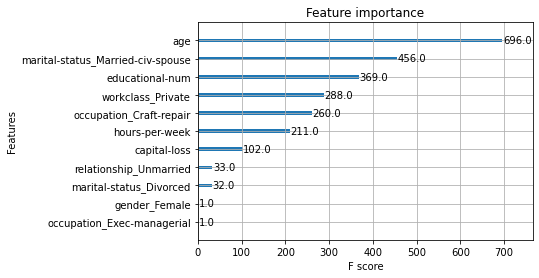

In [98]:
xgb.plot_importance(xgb2, max_num_features=15);

En observant le graphique obtenu, on constate que l'âge domine les autres variables, se démarquant clairement comme le prédicteur le plus important du revenu.
Nous pourrions nous arrêter ici et conclure par la réponse intuitivement satisfaisante que l'âge est la variable la plus importante, suivie des heures travaillées par semaine et du niveau de scolarité.

Avant cela, regardons le fonctionnement de la fonction dans la documentation : On s'aperçoit qu'il y a trois options pour mesurer l'importance des features dans XGBoost :

- 'Weight' (par défaut) : le pourcentage représentant le nombre relatif de fois qu'une feature apparaît dans les arbres du modèle.
- 'Cover' : Le nombre de fois qu'une feature est utilisée pour séparer les données dans l'ensemble des arbres, pondérés par le nombre de données d'entraînement qui passent par ces séparations.
- 'Gain' : La réduction moyenne de la fonction de perte obtenue lors de l'utilisation d'une feature pour séparer une branche.
Il est important de comprendre le fonctionnement de ces métriques pour bien interpréter les résultats affichés.
Par exemple, en utilisant 'Weight', il est logique qu'une variable avec un grand nombre de valeurs possibles et qui puisse être utilisée un grand nombre de fois dans un arbre (comme l'âge) ait une importance bien supérieure à une variable binaire qui ne peut être utilisée au maximum une fois dans chaque arbre (comme le genre).
Cependant, le genre pourrait être une feature qui affecte grandement les résultats finaux et avoir une grande importance, basée sur le 'Gain' ou la 'Cover'.

Une valeur plus élevée de la métrique 'Gain' pour une feature par rapport à une autre implique qu'elle est plus importante pour générer une prédiction.
Il s'agit donc, pour beaucoup, de la métrique la plus pertinente pour interpréter l'importance relative de chaque feature.

(e) Exécuter la cellule suivante pour afficher les features importantes selon les différentes métriques disponibles.

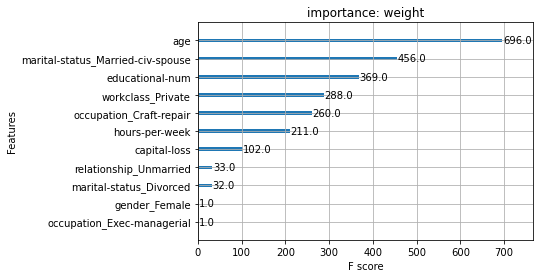

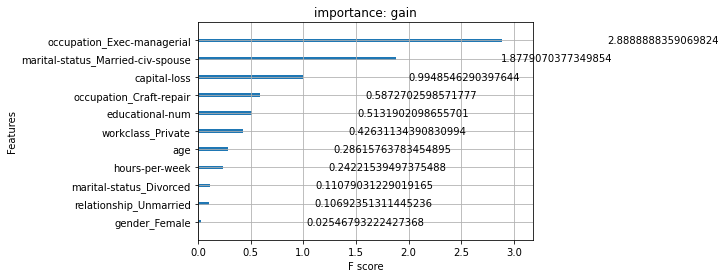

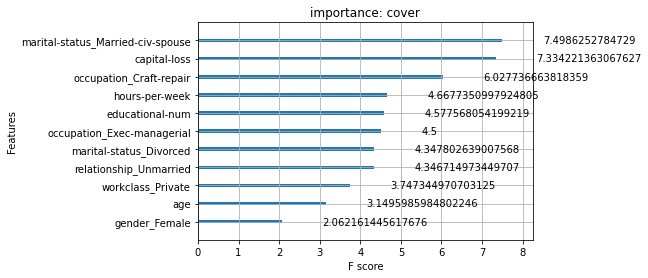

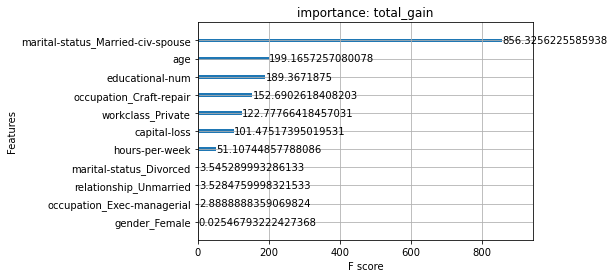

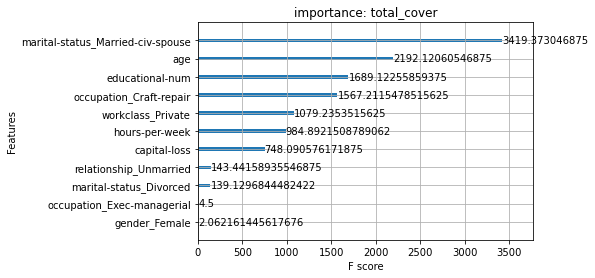

In [99]:
types= ['weight', 'gain', 'cover', 'total_gain', 'total_cover']

for f in types:
    xgb.plot_importance(xgb2 ,max_num_features=15, importance_type=f, title='importance: '+f);

XGBoost contient sa propre fonction xgb.cv() qui permet d'utiliser la validation croisée pour l'évaluation d'un modèle, sans avoir besoin de passer par un package externe.
Elle s'utilise de la même manière que train(), avec des arguments supplémentaires comme nfold pour choisir le nombre d'échantillons pour la validation croisée, et retourne un tableau des scores d'entraînement et de test pour chaque itération.

(f) Retourner, dans bst_cv, les résultats obtenus par cross-validation à 3 échantillons sur train, avec 100 itérations de boosting par étape, avec early_stopping_rounds= 60 pour stopper l'entraînement de chaque échantillon si l'évaluation ne s'améliore pas pendant 60 itérations.
(g) Afficher bst_cv.

In [100]:
bst_cv = xgb.cv(params=params,
                dtrain=train,
                num_boost_round=100,
                nfold=3,
                early_stopping_rounds=60)
bst_cv

[20:16:03] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:16:03] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:16:03] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,train-logloss-mean,train-logloss-std,test-logloss-mean,test-logloss-std
0,0.689035,0.000971,0.690443,0.000564
1,0.685340,0.001747,0.687644,0.000986
2,0.681699,0.002530,0.684893,0.001421
3,0.678111,0.003307,0.682187,0.001858
4,0.674575,0.004076,0.679527,0.002296
...,...,...,...,...
95,0.484252,0.043549,0.560324,0.030803
96,0.483029,0.043757,0.559593,0.031267
97,0.481823,0.044009,0.559315,0.031404
98,0.480682,0.044277,0.558612,0.031865


(h) Stocker dans preds les probabilités obtenues avec xgb2 sur test.  
(i) Créer une Series xgbpreds contenant les labels correspondant aux probabilités obtenues, en utilisant un seuil de 0.5 (i.e. 1 si la probabilité >=0.5, 0 sinon).  
(j) Afficher une matrice de confusion entre xgbpreds et les labels de l'ensemble de test.

In [102]:
preds = xgb2.predict(test)

xgbpreds = pd.Series(np.where(preds > 0.5, 1, 0))

pd.crosstab(xgbpreds, pd.Series(y_test))

col_0,0,1
row_0,,
0,7,1
1,2,1


Il est possible obtenir l'erreur de prédiction du modèle sur un échantillon directement depuis une DMatrix, grâce à la méthode eval().

(k) Afficher l'erreur du modèle sur l'échantillon de validation contenu dans valid.

In [103]:
xgb2.eval(valid)

'[0]\teval-logloss:0.137382'

Le modèle créé, sans réel tuning des paramètres, nous offre déjà un score plus que correct.
Le taux de bonnes prédictions peut probablement être amélioré avec une procédure de tuning de paramètres avec un GridSearch.

A titre de comparaison, un modèle de RandomForest obtient une accuracy de minimum 2 points de moins sur les mêmes données.

Nous concluons ici ce module important sur les principaux algorithmes de classification en Apprentissage Supervisé.

Dans le module suivant, vous découvrirez comment utiliser ces modèles dans le cas de données qui peuvent poser problème.
Vous y apprendrez également comment sélectionner et interpréter un modèle de Machine Learning.